In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import warnings
import yaml

plt.style.use("plot_style.mplstyle")
warnings.filterwarnings("ignore")

In [2]:
# Laser is certified up to Pout = 35 mW
DFB_Pout = 10*np.log10(35e-3/1e-3)
SOA_Pout = 17

## Cross-check the resistance of the diodes with diode-IVs => linearity check

(0.0, 2.0)

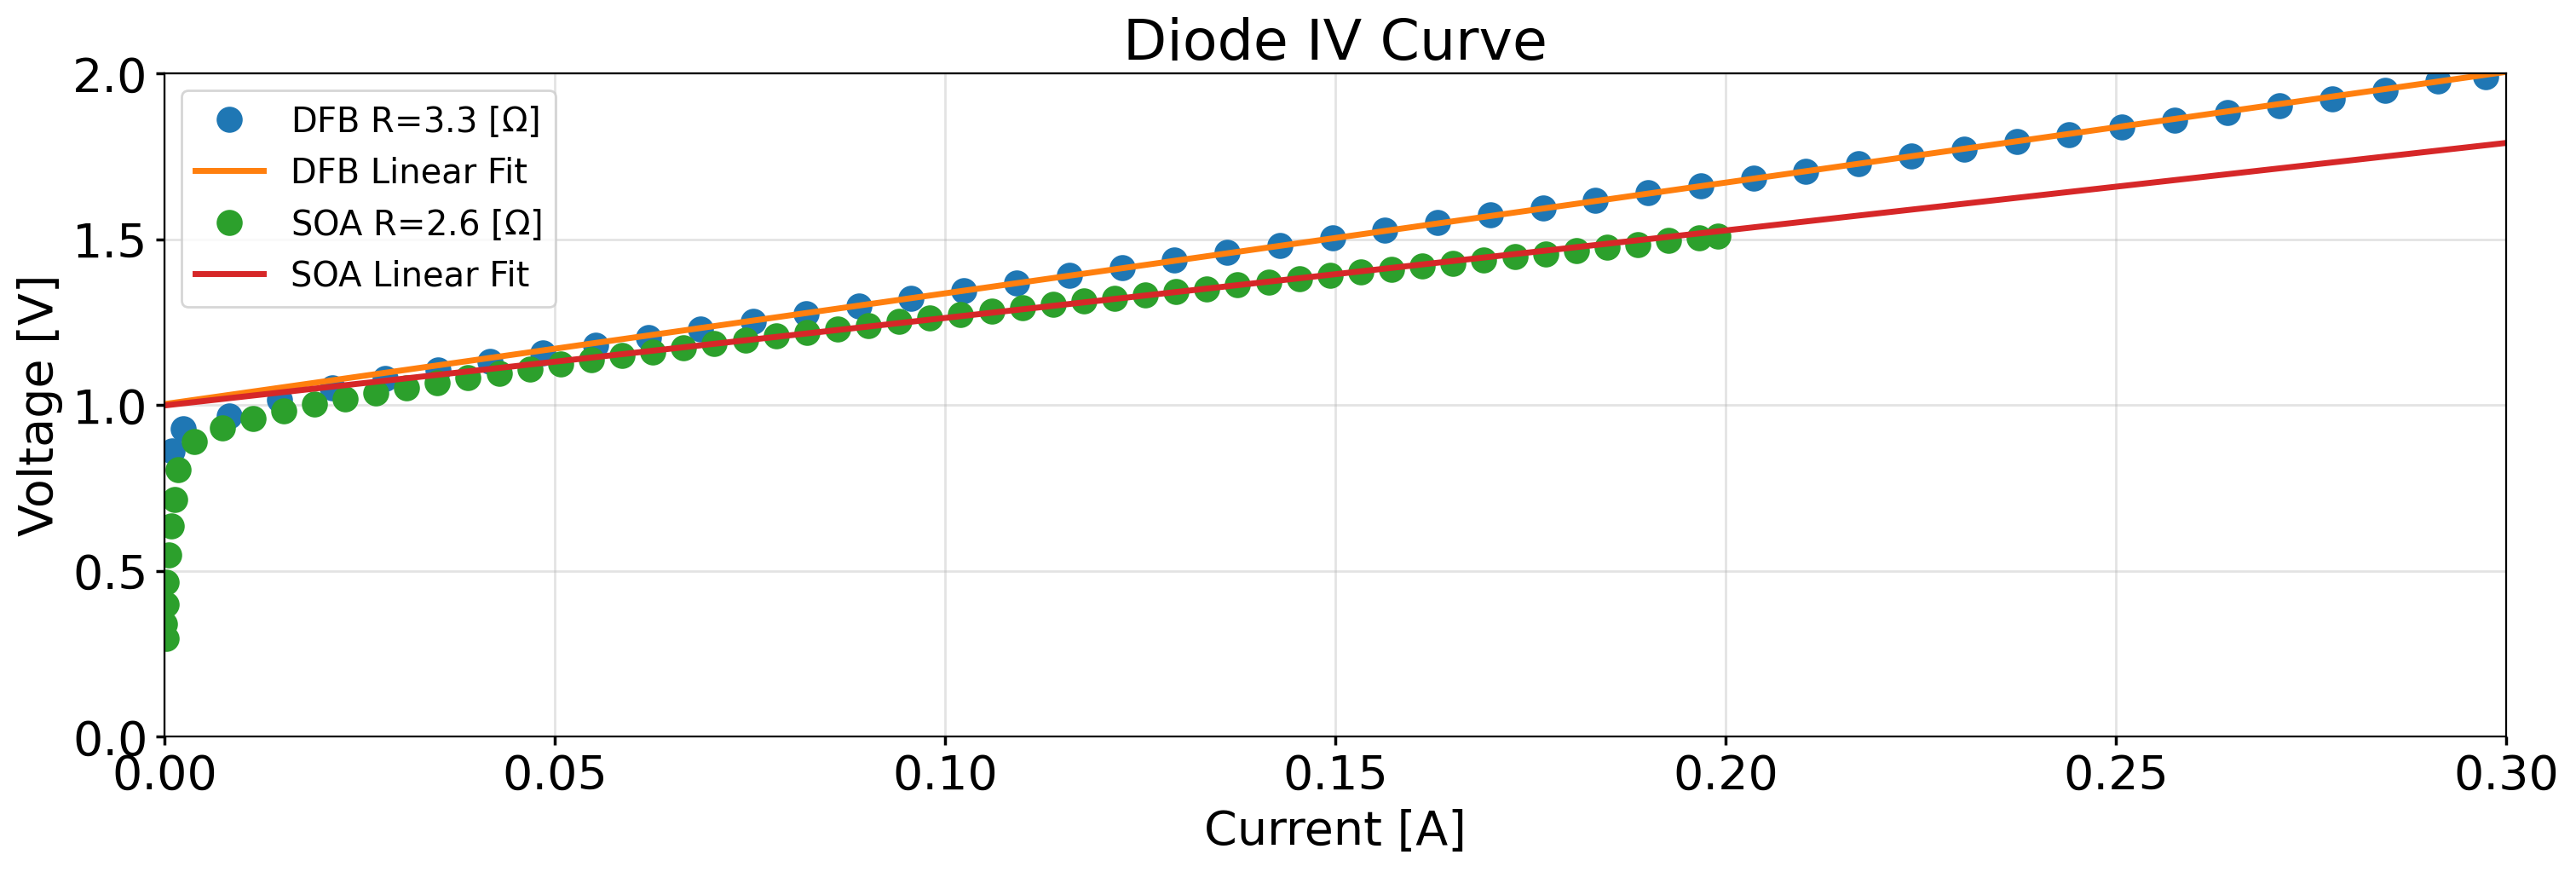

In [3]:
dfb_iv = pd.read_csv('dfb_iv.csv', header=None)
dfb_iv.sort_values(by=[0], inplace=True)
soa_iv = pd.read_csv('soa_iv.csv', header=None)
soa_iv.sort_values(by=[0], inplace=True)
dfb_lin_fit = np.polyfit(dfb_iv[0].values[10:40], dfb_iv[1].values[10:40], 1)
DFB_R = dfb_lin_fit[0]
soa_lin_fit = np.polyfit(soa_iv[0].values[20:50], soa_iv[1].values[20:50], 1)
SOA_R = soa_lin_fit[0]

current = np.linspace(0.0,0.5,1001)

plt.figure(figsize=(15,5))
plt.plot(dfb_iv[0], dfb_iv[1], 'o', label=f'DFB R={DFB_R:0.1f}'+r' [$\Omega$]')
plt.plot(current, dfb_lin_fit[0]*current+dfb_lin_fit[1], label='DFB Linear Fit')
plt.plot(soa_iv[0], soa_iv[1], 'o', label=f'SOA R={SOA_R:0.1f}'+r' [$\Omega$]')
plt.plot(current, soa_lin_fit[0]*current+soa_lin_fit[1], label='SOA Linear Fit')
plt.xlabel('Current [A]')
plt.ylabel('Voltage [V]')
plt.title('Diode IV Curve')
plt.grid(True)
plt.legend()
plt.xlim([0,0.3])
plt.ylim([0,2])

(0.0, 20.0)

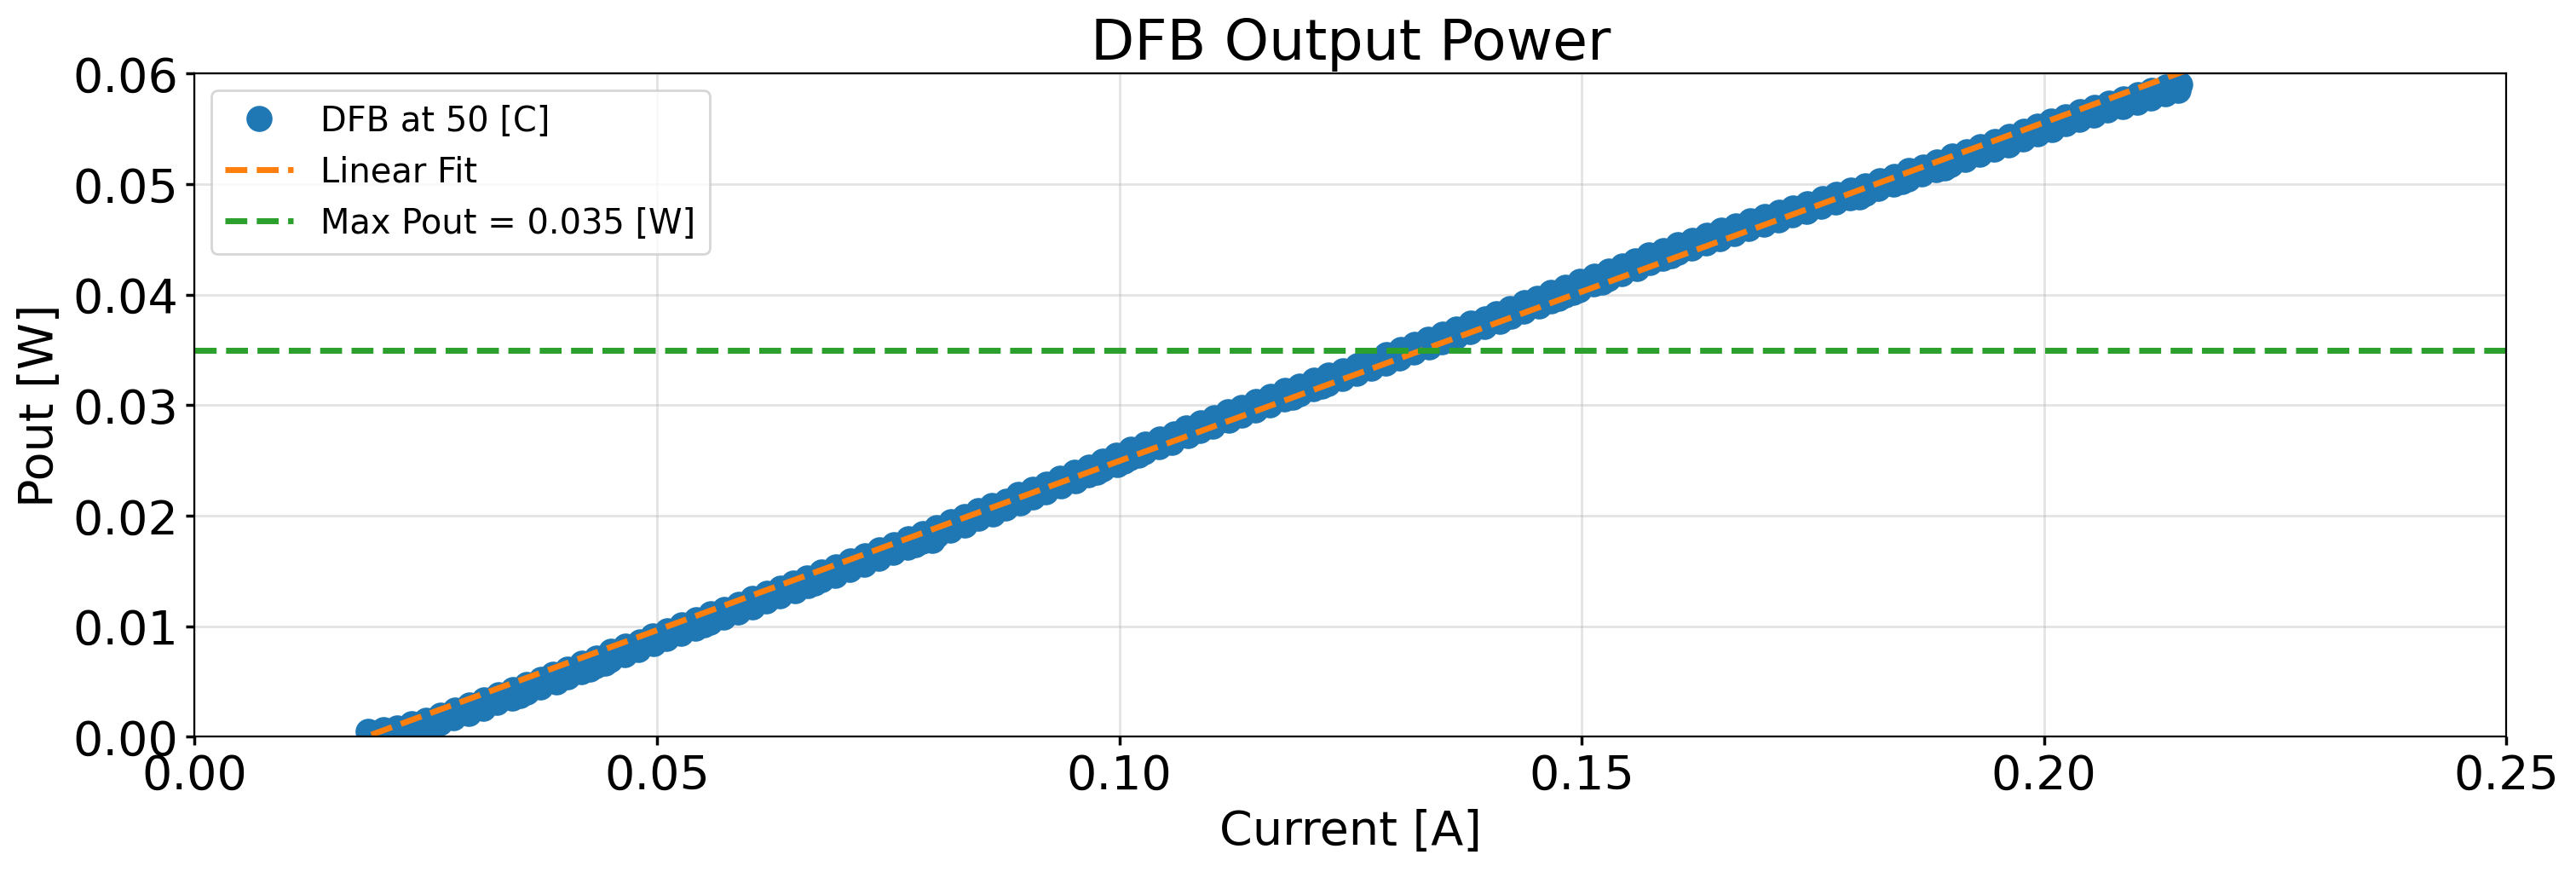

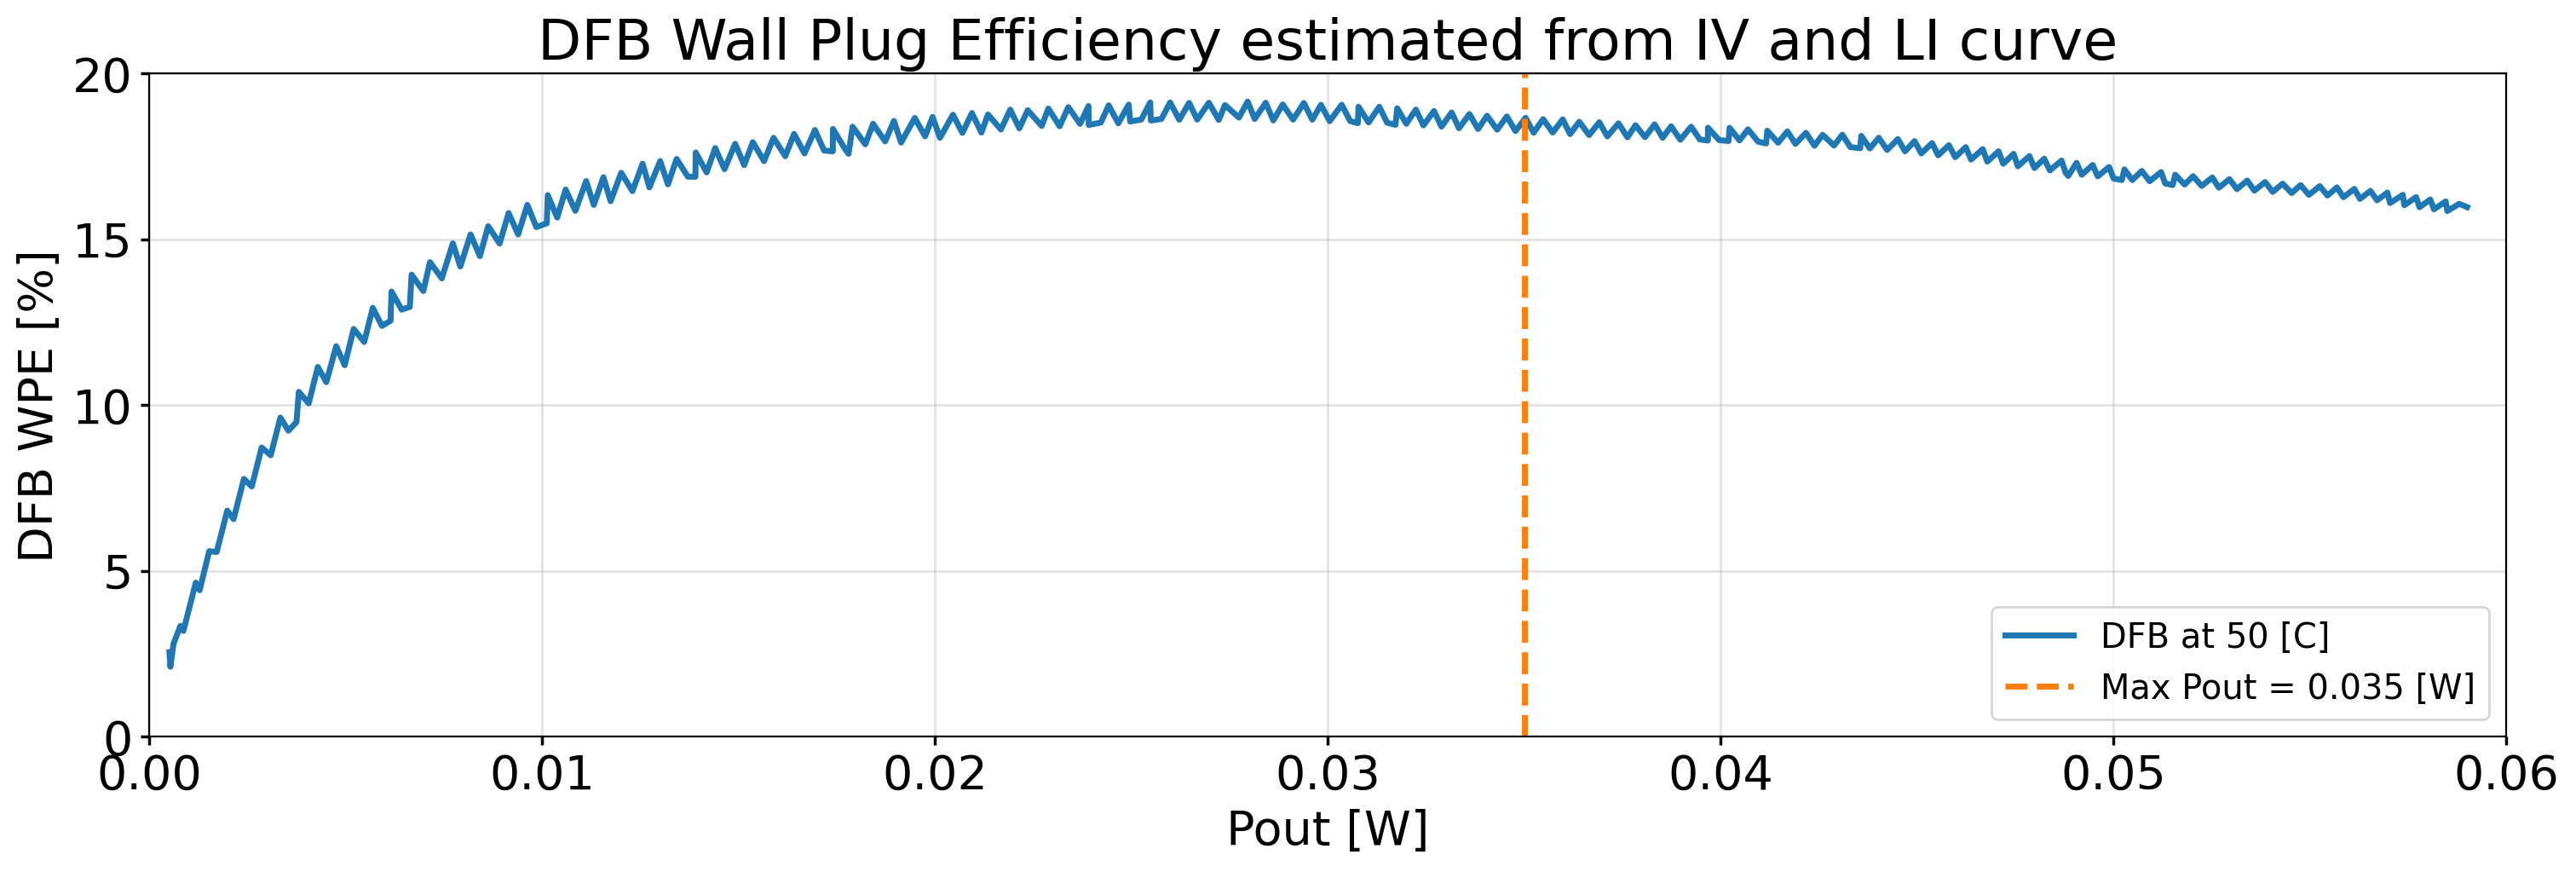

In [4]:
dfb_li_50c = pd.read_csv('DFB_L_W_I_A_T50C.csv', header=None)
dfb_li_50c.sort_values(by=[1], inplace=True)

dfb_li_fit = np.polyfit(dfb_li_50c[0].values[50:-1], dfb_li_50c[1].values[50:-1],1)
# current = np.linspace(0.0, 0.5, 1001)
plt.figure(figsize=(15,5))
plt.plot(dfb_li_50c[0], dfb_li_50c[1], 'o',label='DFB at 50 [C]')
plt.plot(current, current*dfb_li_fit[0] + dfb_li_fit[1], '--', label='Linear Fit')
plt.plot(np.linspace(0,0.25,100), np.ones(100)*0.035, '--', label='Max Pout = 0.035 [W]')
plt.xlim([0,0.25])
plt.ylim([0,0.06])
plt.xlabel('Current [A]')
plt.ylabel('Pout [W]')
plt.title('DFB Output Power')
plt.grid(True)
plt.legend()

plt.figure(figsize=(15,5))
plt.plot(dfb_li_50c[1], 100* dfb_li_50c[1].values/(dfb_li_50c[0].values * (dfb_li_50c[0].values * dfb_lin_fit[0] + dfb_lin_fit[1])), label='DFB at 50 [C]')
plt.plot(np.ones(21) * 0.035, np.linspace(0, 20, 21), '--', label='Max Pout = 0.035 [W]')
plt.xlabel('Pout [W]')
plt.ylabel('DFB WPE [%]')
plt.title('DFB Wall Plug Efficiency estimated from IV and LI curve')
plt.grid(True)
plt.legend()
plt.xlim([0,0.06])
plt.ylim([0,20])

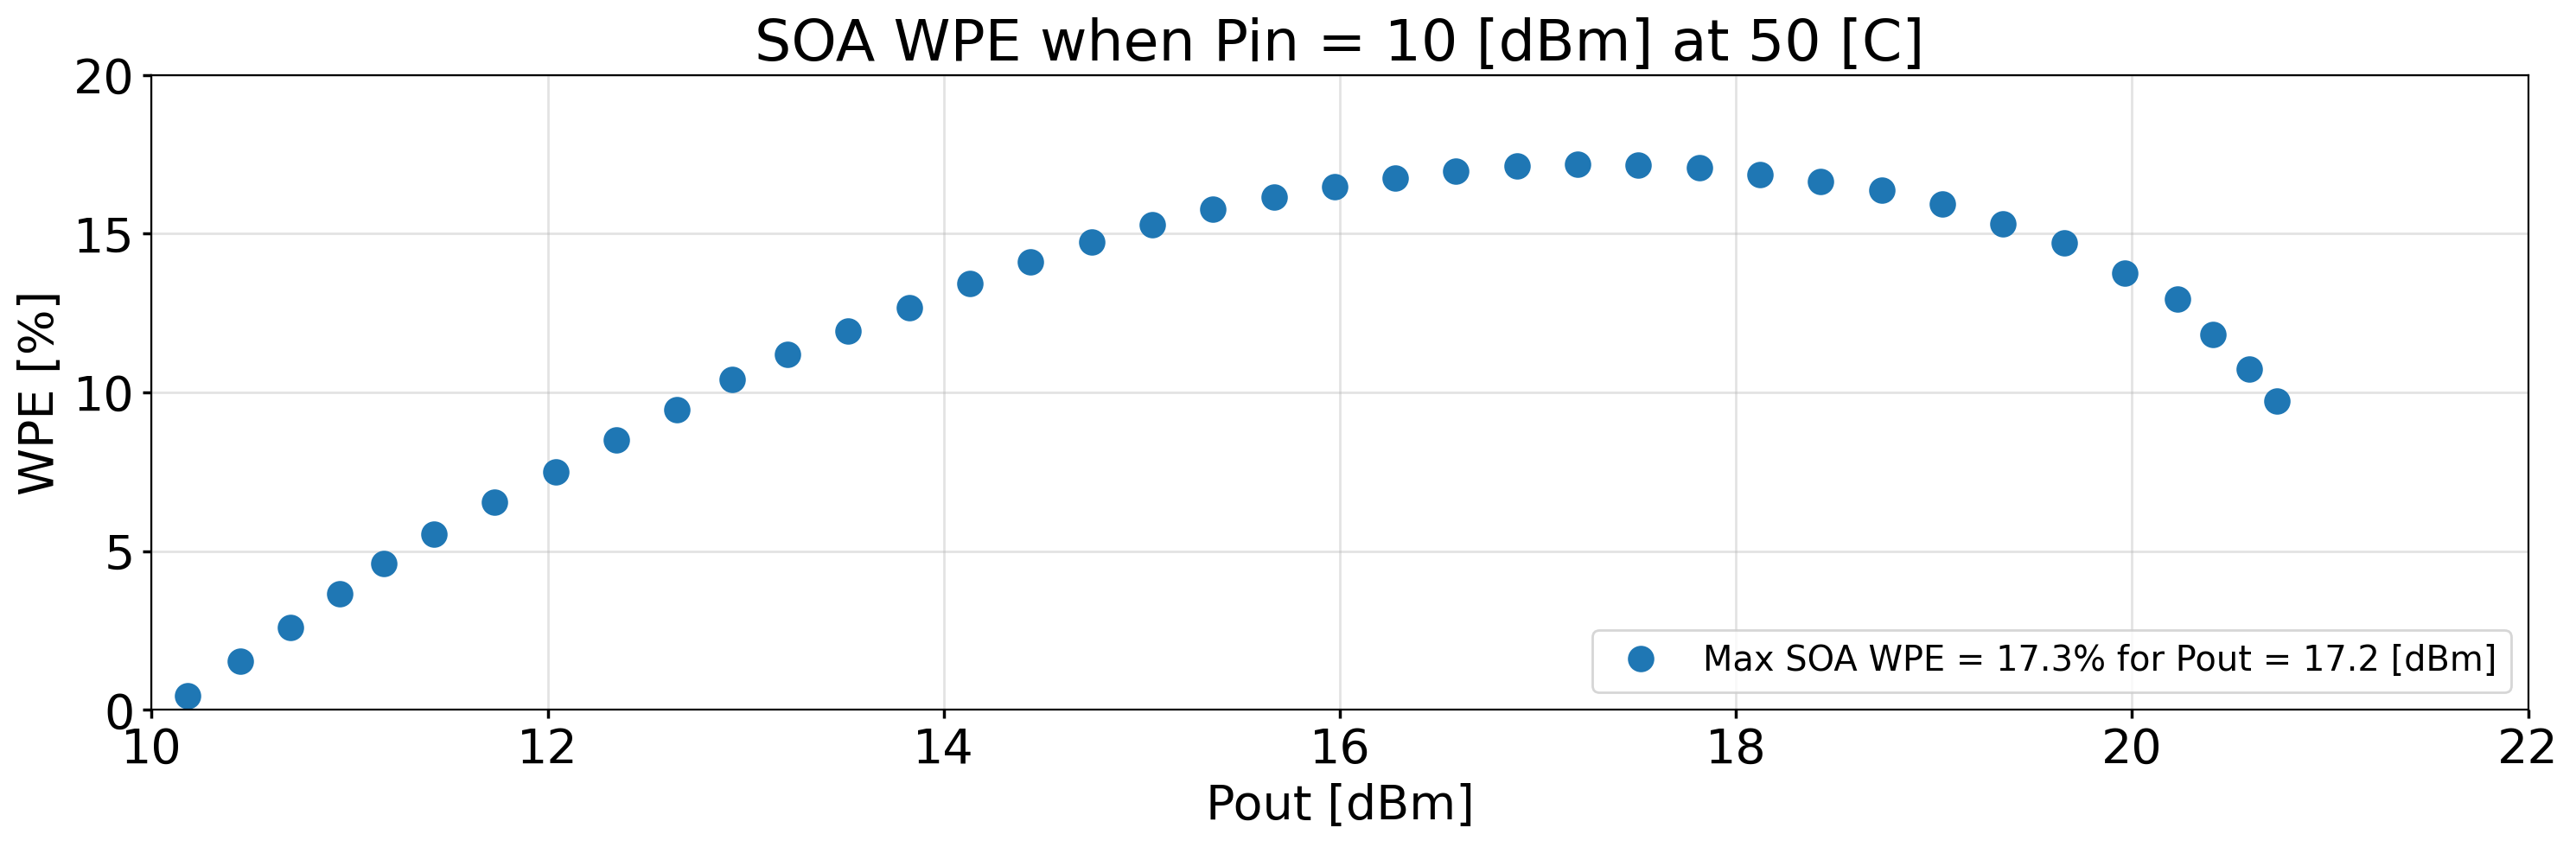

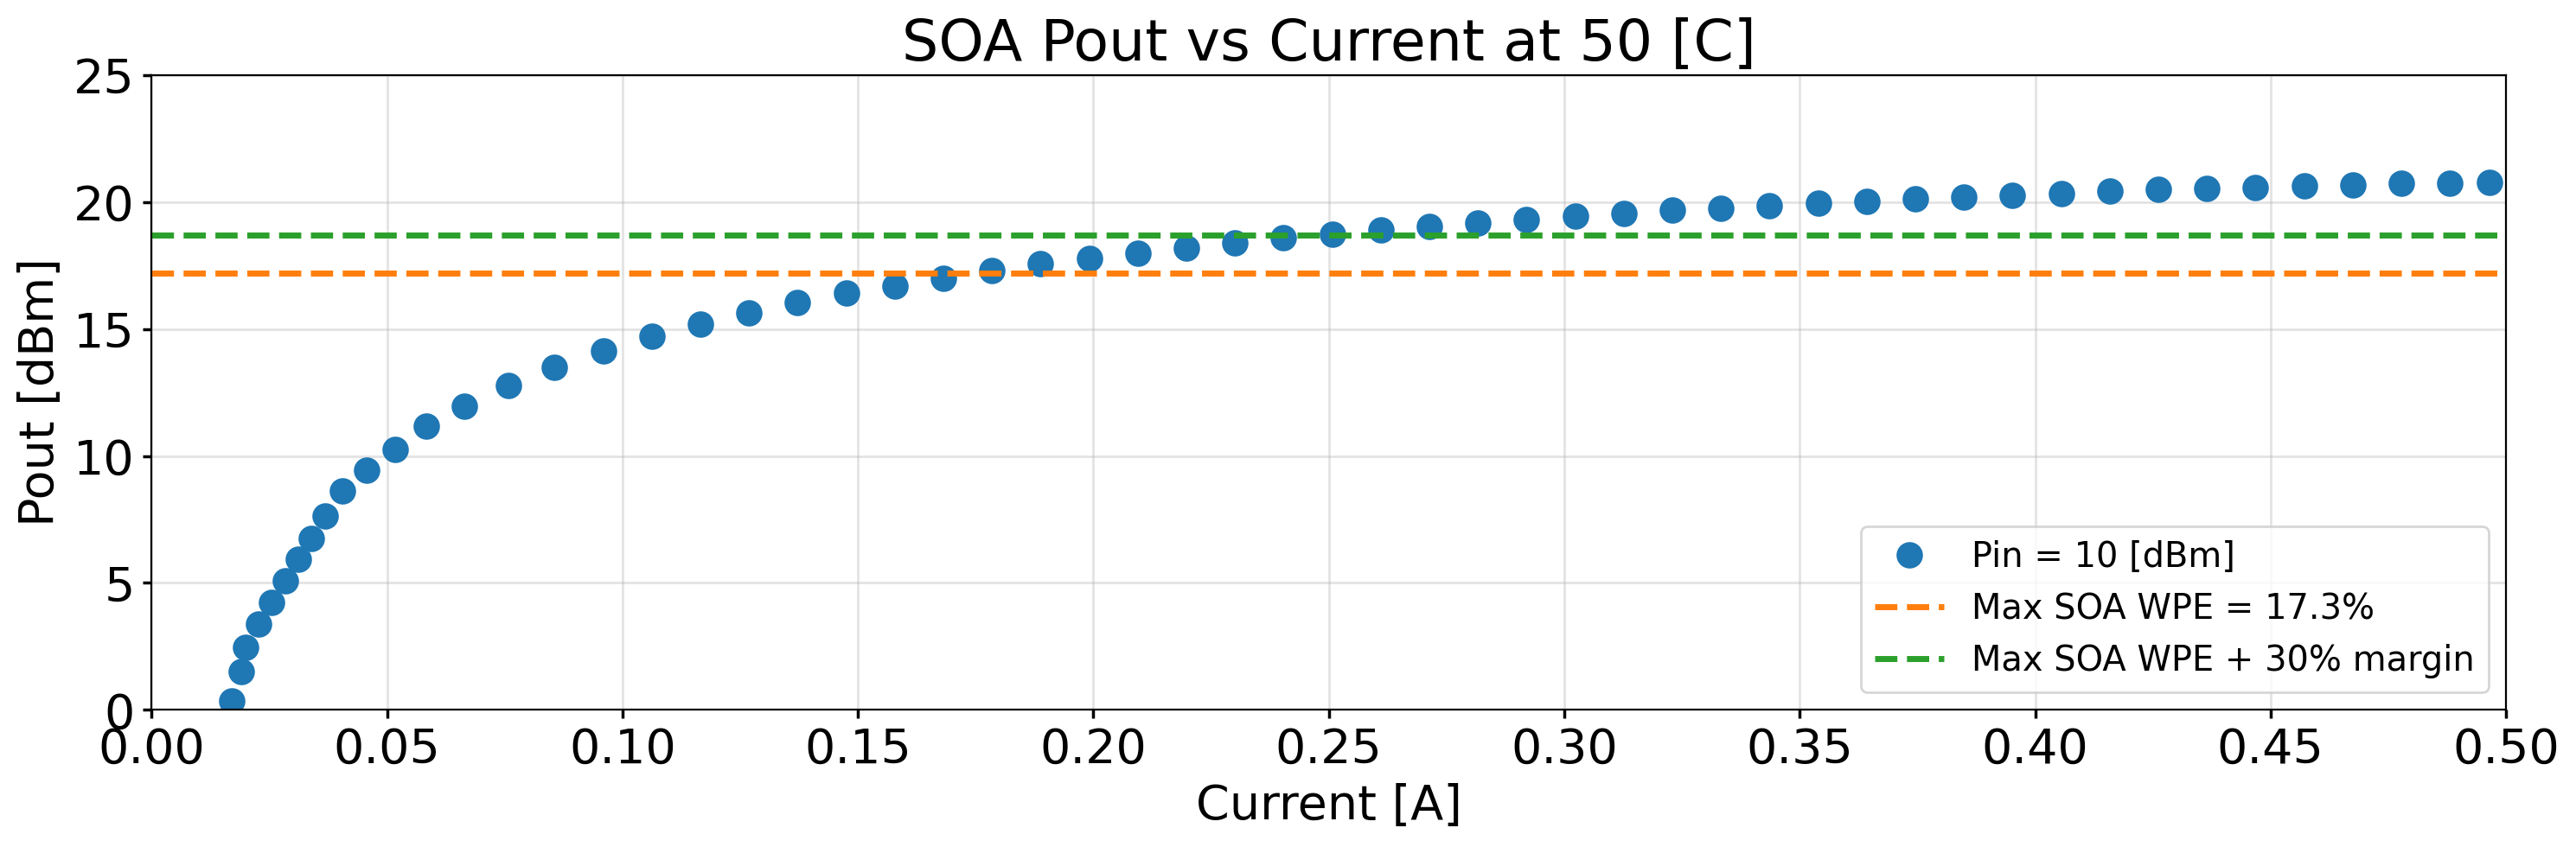

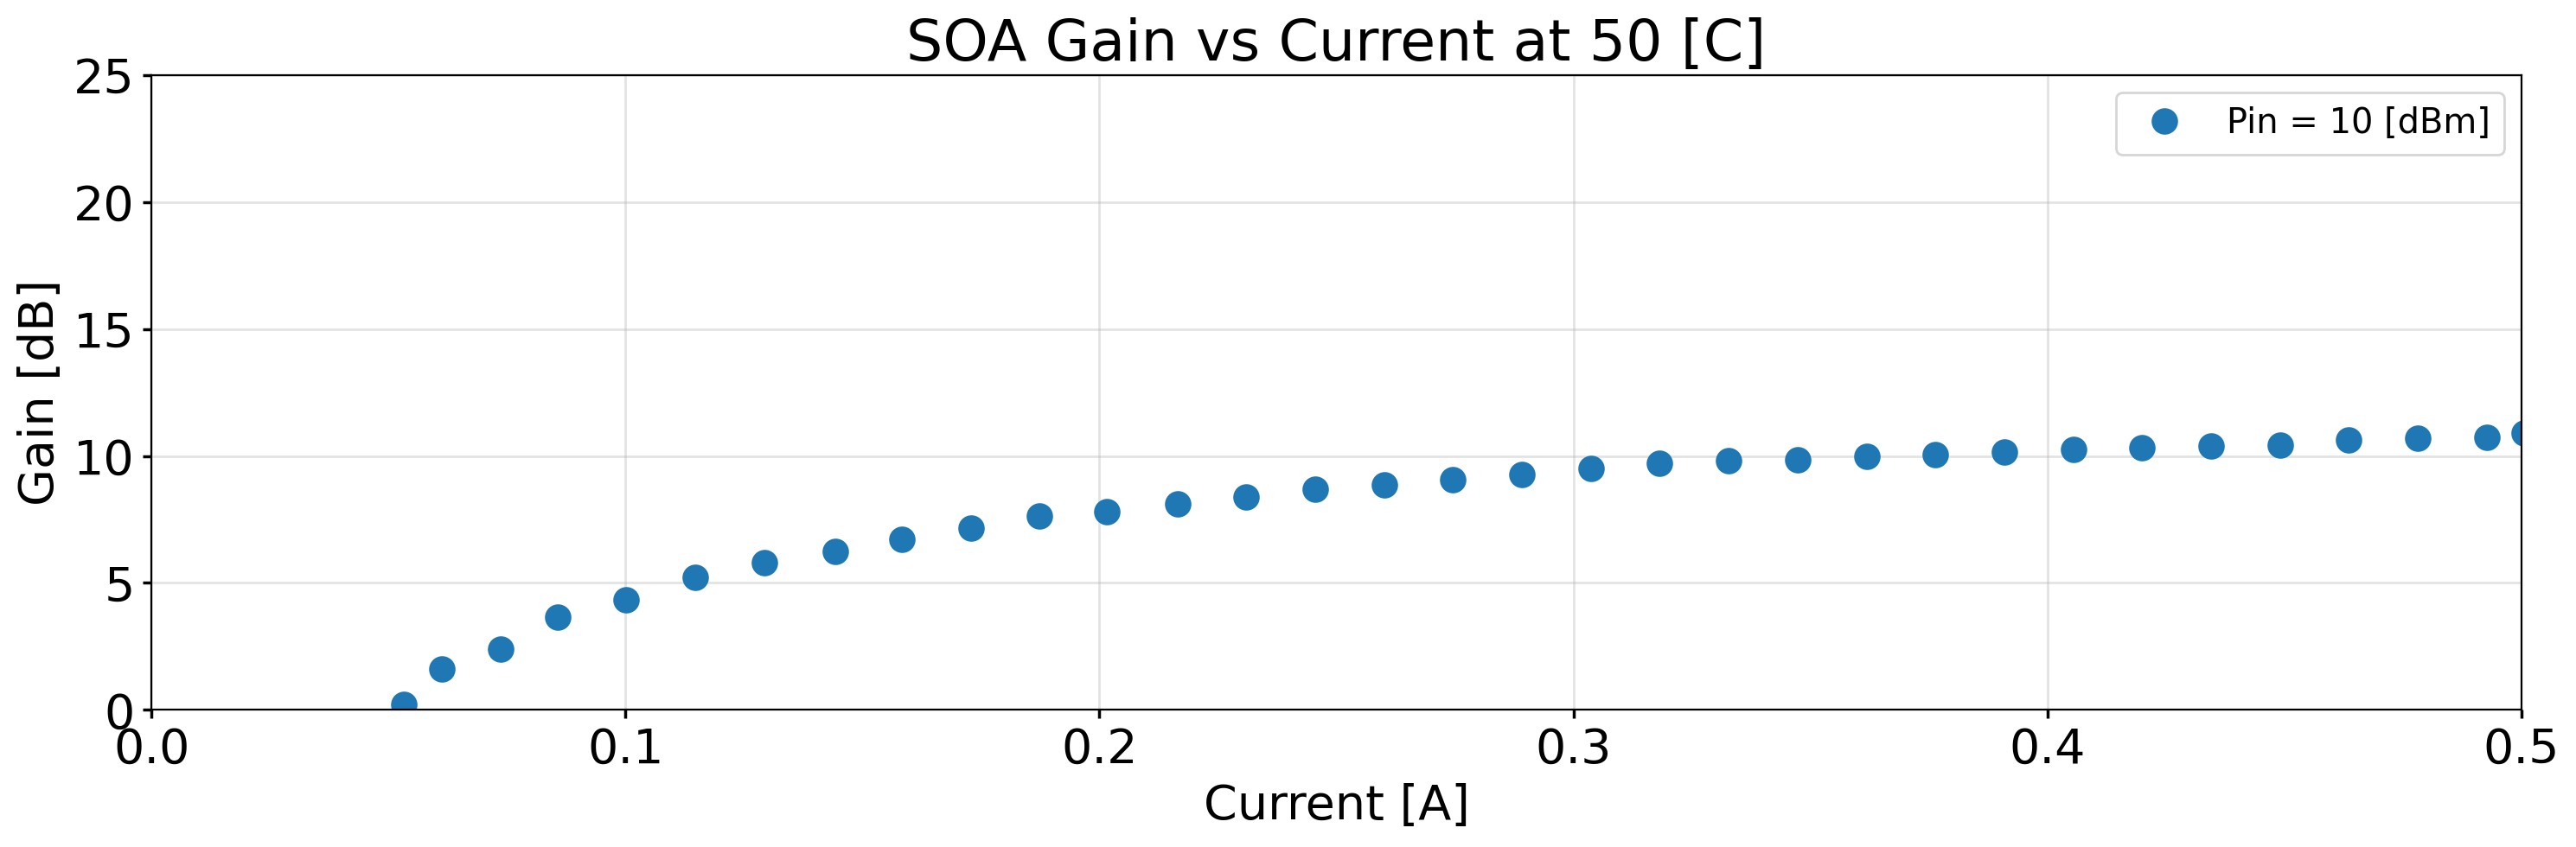

In [5]:
soa_wpe = pd.read_csv('SOA_WPE_Pout_dBm_Pin_10dBm_50C.csv', header=None)
soa_wpe.sort_values(by=[0], inplace=True)

soa_wpe_fit = np.polyfit(soa_wpe[0], soa_wpe[1], 3)
pout = np.linspace(10, 22, 1001)
soa_wpe_extract = np.polyval(soa_wpe_fit, pout)
SOA_Pout = pout[np.argmax(soa_wpe_extract)]

soa_li_pin_0dBm = pd.read_csv('soa_ppdpost_dBm_i_pin_0dBm_50C.csv', header=None)
soa_li_pin_5dBm = pd.read_csv('soa_ppdpost_dBm_i_pin_5dBm_50C.csv', header=None)
soa_li_pin_10dBm = pd.read_csv('soa_ppdpost_dBm_i_pin_10dBm_50C.csv', header=None)

soa_gi_pin_0dBm = pd.read_csv('SOA_Gain_dB_I_A_Pin_0dBm_T50C.csv', header=None)
soa_gi_pin_5dBm = pd.read_csv('SOA_Gain_dB_I_A_Pin_5dBm_T50C.csv', header=None)
soa_gi_pin_5dBm.sort_values(by=[0], inplace=True)
soa_gi_pin_10dBm = pd.read_csv('SOA_Gain_dB_I_A_Pin_10dBm_T50C.csv', header=None)

plt.figure(figsize=(15,5))
plt.plot(soa_wpe[0], soa_wpe[1], 'o', label = f'Max SOA WPE = {np.max(soa_wpe_extract):0.1f}% for Pout = {SOA_Pout:0.1f} [dBm]')
plt.xlabel('Pout [dBm]')
plt.ylabel('WPE [%]')
plt.title('SOA WPE when Pin = 10 [dBm] at 50 [C]')
plt.grid(True)
plt.xlim([10,22])
plt.ylim([0,20])
plt.legend(loc=4)
plt.tight_layout()

plt.figure(figsize=(15,5))
# plt.plot(soa_li_pin_0dBm[0], soa_li_pin_0dBm[1], 'o', label='Pin = 0 [dBm]')
# plt.plot(soa_li_pin_5dBm[0], soa_li_pin_5dBm[1], 'o', label='Pin = 5 [dBm]')
plt.plot(soa_li_pin_10dBm[0], soa_li_pin_10dBm[1],'o', label='Pin = 10 [dBm]')
plt.plot(np.linspace(0,0.5, 41), np.ones(41) * SOA_Pout, linestyle = '--', label=f'Max SOA WPE = {np.max(soa_wpe_extract):0.1f}%')
plt.plot(np.linspace(0,0.5, 41), np.ones(41) * (SOA_Pout+1.5), linestyle = '--', label=f'Max SOA WPE + 30% margin')
# plt.plot(np.linspace(0,0.5, 41), np.ones(41) * (SOA_Pout-1.5), linestyle = '--', label=f'Max SOA WPE + 30% margin')
plt.xlabel('Current [A]')
plt.ylabel('Pout [dBm]')
plt.title('SOA Pout vs Current at 50 [C]')
plt.grid(True)
plt.legend()
plt.xlim([0,0.5])
plt.xticks(np.linspace(0,0.5, 11))
plt.ylim([0,25])
plt.tight_layout()
plt.figure(figsize=(15,5))
# plt.plot(soa_gi_pin_0dBm[0], soa_gi_pin_0dBm[1], 'o', label='Pin = 0 [dBm]')
# plt.plot(soa_gi_pin_5dBm[0], soa_gi_pin_5dBm[1], 'o', label='Pin = 5 [dBm]')
plt.plot(soa_gi_pin_10dBm[0], soa_gi_pin_10dBm[1],'o', label='Pin = 10 [dBm]')
plt.xlabel('Current [A]')
plt.ylabel('Gain [dB]')
plt.title('SOA Gain vs Current at 50 [C]')
plt.grid(True)
plt.legend()
plt.xlim([0,0.5])
plt.ylim([0,25])
plt.tight_layout()

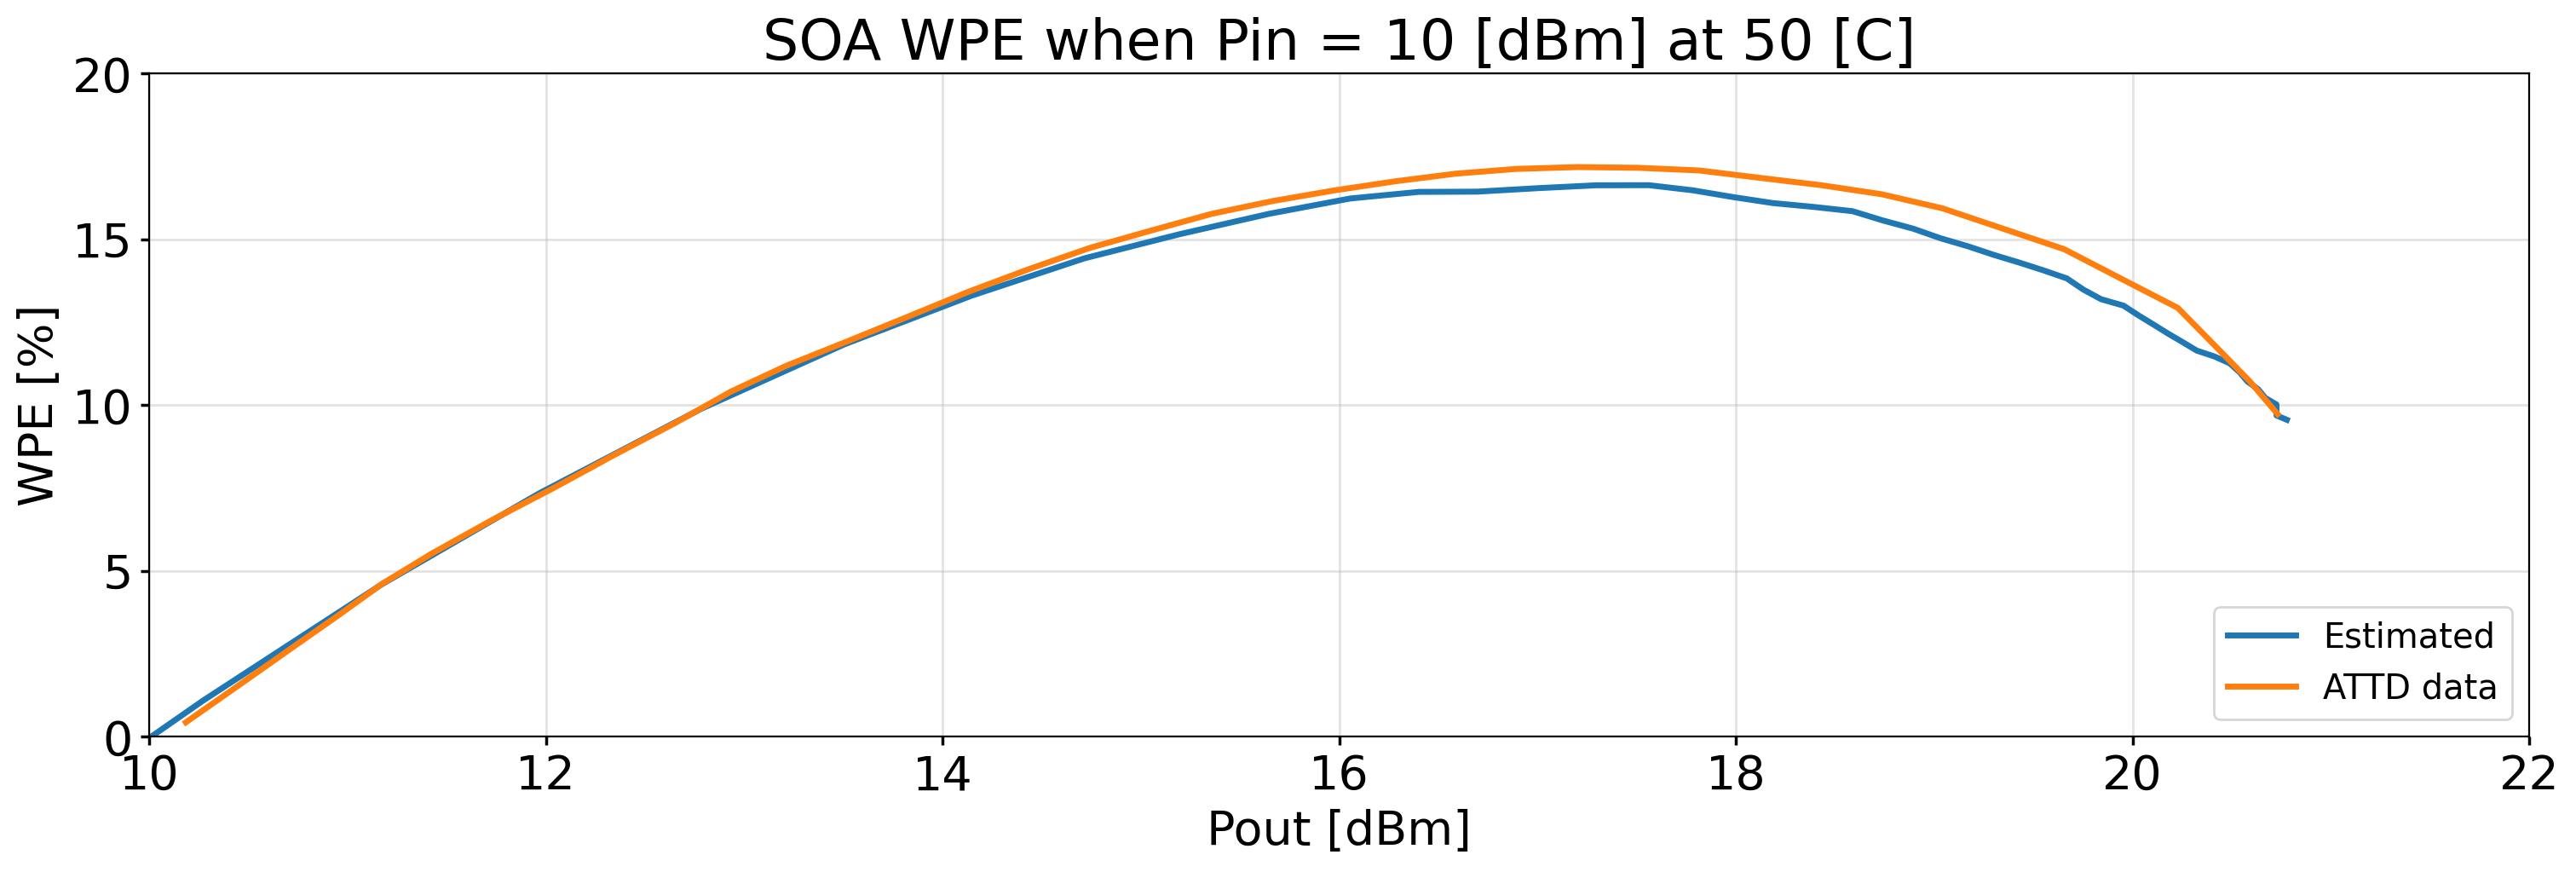

In [6]:
plt.figure(figsize=(15,5))
plt.plot(soa_li_pin_10dBm[1].values , 1e2 * (10**(soa_li_pin_10dBm[1].values/10)*1e-3 - 10e-3)/ (soa_li_pin_10dBm[0].values * (soa_li_pin_10dBm[0].values * soa_lin_fit[0] + soa_lin_fit[1])), label='Estimated')
plt.plot(soa_wpe[0], soa_wpe[1], label = f'ATTD data')
plt.xlabel('Pout [dBm]')
plt.ylabel('WPE [%]')
plt.title('SOA WPE when Pin = 10 [dBm] at 50 [C]')
plt.grid(True)
plt.xlim([10,22])
plt.ylim([0,20])
plt.legend(loc=4)

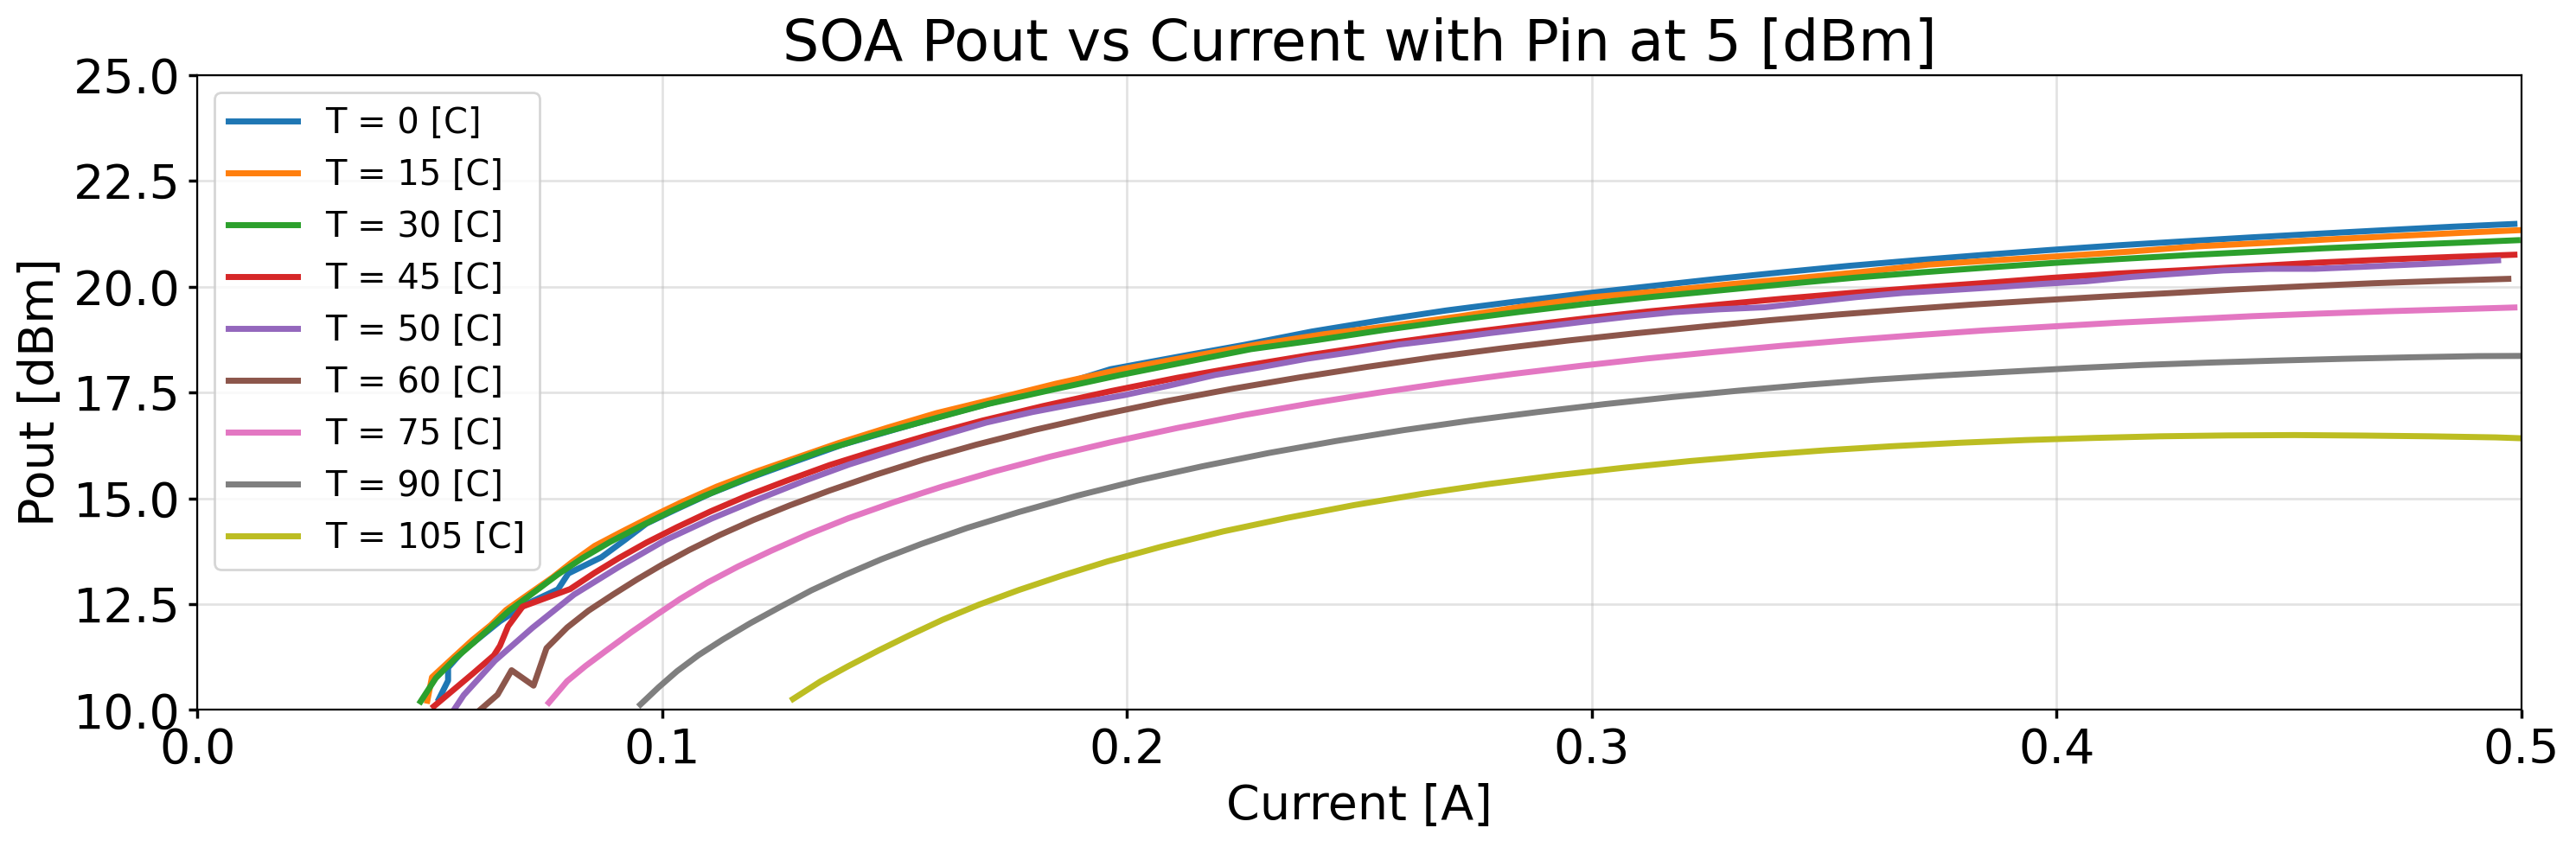

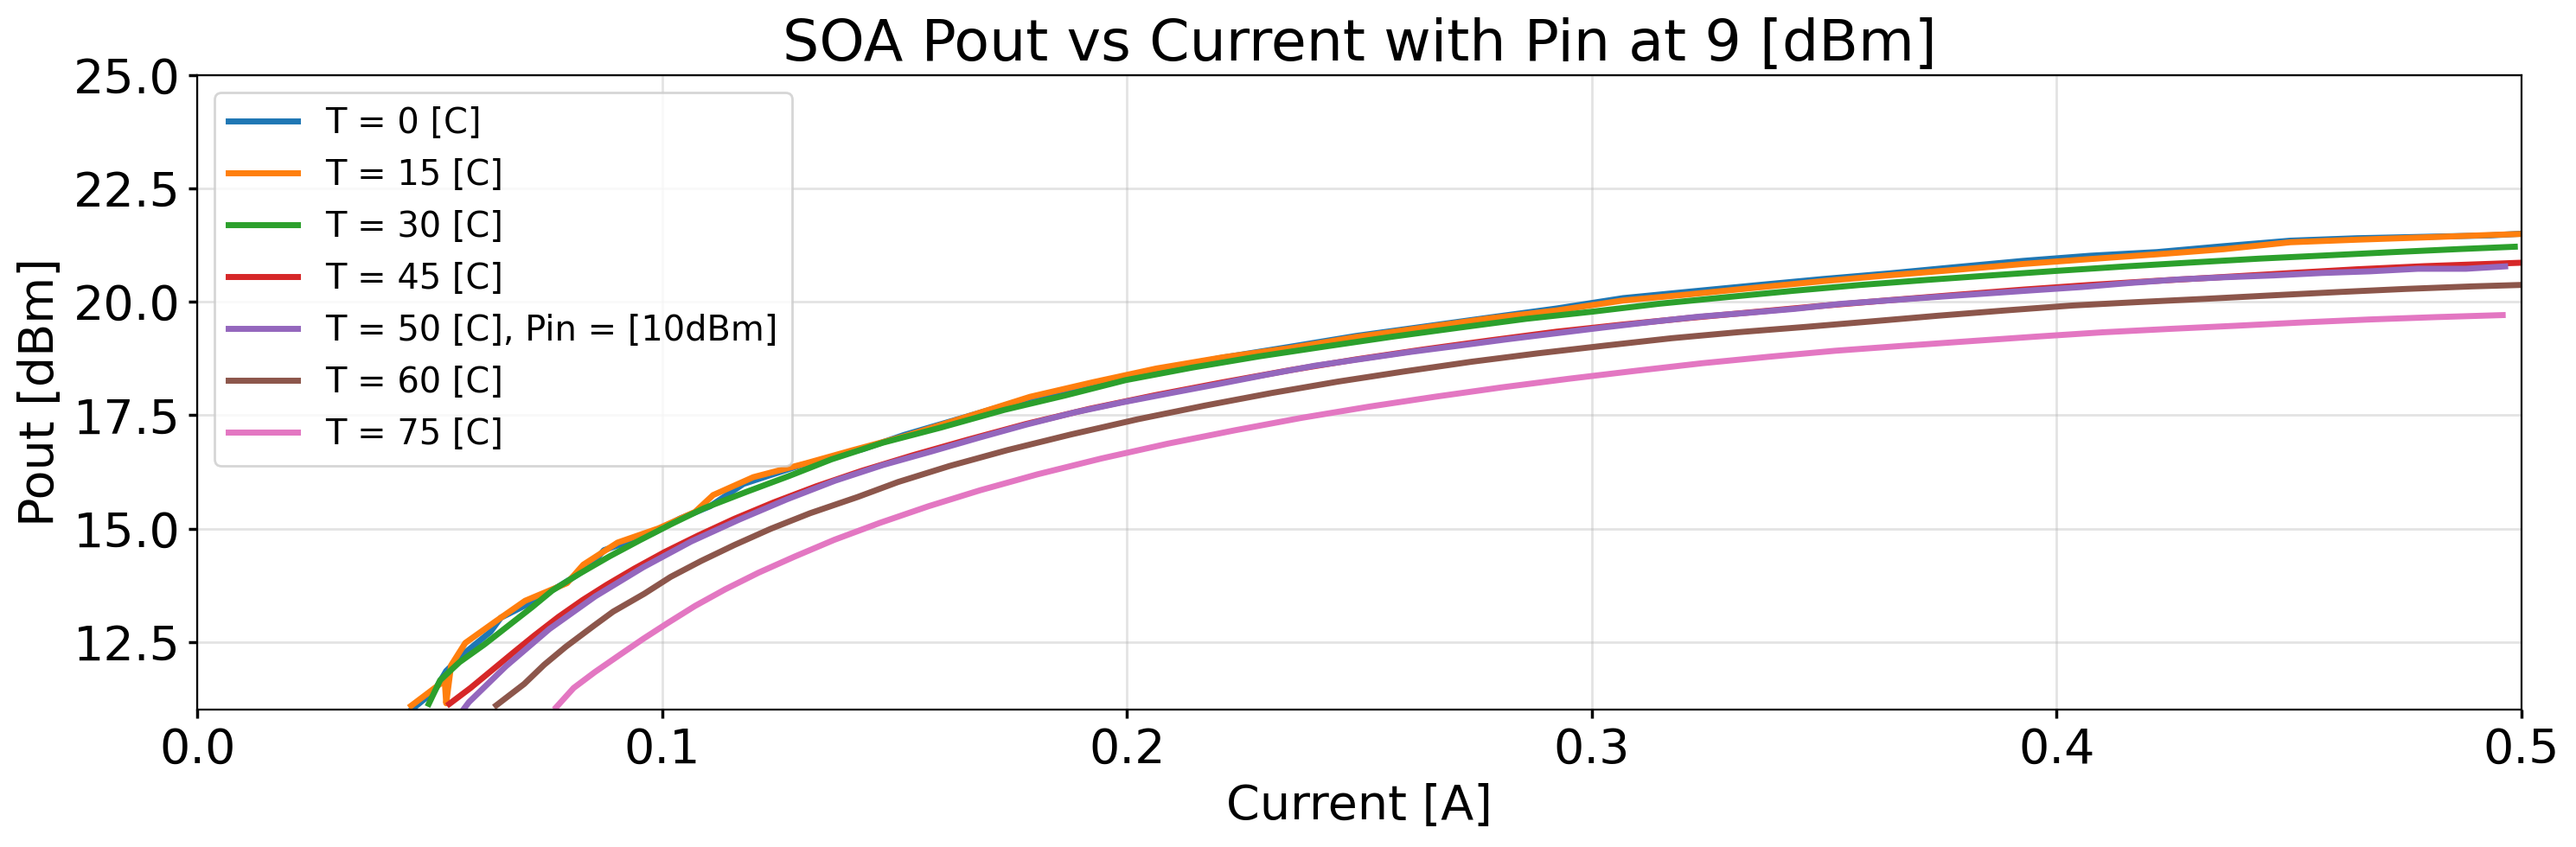

In [7]:
T_range = [0, 15, 30, 45, 60, 75, 90, 105]
plt.figure(figsize=(15,5))
for T in T_range:
  soa_pout_pin = pd.read_csv(f'SOA_Pout_dBm_I_A_Pin_5dBm_T{T}C.csv', header=None)
  soa_pout_pin.sort_values(by=[0], inplace=True)
  plt.plot(soa_pout_pin[0], soa_pout_pin[1], label=f'T = {T} [C]')
  if T == 45:
    soa_pout_pin = pd.read_csv(f'soa_ppdpost_dBm_i_pin_5dBm_50C.csv', header=None)
    plt.plot(soa_pout_pin[0], soa_pout_pin[1], label=f'T = 50 [C]')
plt.xlabel('Current [A]')
plt.ylabel('Pout [dBm]')
plt.title('SOA Pout vs Current with Pin at 5 [dBm]')
plt.grid(True)
plt.xlim([0,0.5])
plt.ylim([10,25])
plt.legend()
plt.tight_layout()
plt.figure(figsize=(15,5))
for T in T_range[:-2]:
  soa_pout_pin = pd.read_csv(f'SOA_Pout_dBm_I_A_Pin_9dBm_T{T}C.csv', header=None)
  soa_pout_pin.sort_values(by=[0], inplace=True)
  plt.plot(soa_pout_pin[0], soa_pout_pin[1], label=f'T = {T} [C]')
  if T == 45:
    soa_pout_pin = pd.read_csv(f'soa_ppdpost_dBm_i_pin_10dBm_50C.csv', header=None)
    plt.plot(soa_pout_pin[0], soa_pout_pin[1], label=f'T = 50 [C], Pin = [10dBm]')
plt.xlabel('Current [A]')
plt.ylabel('Pout [dBm]')
plt.title('SOA Pout vs Current with Pin at 9 [dBm]')
plt.grid(True)
plt.xlim([0,0.5])
plt.ylim([11,25])
plt.legend()
plt.tight_layout()

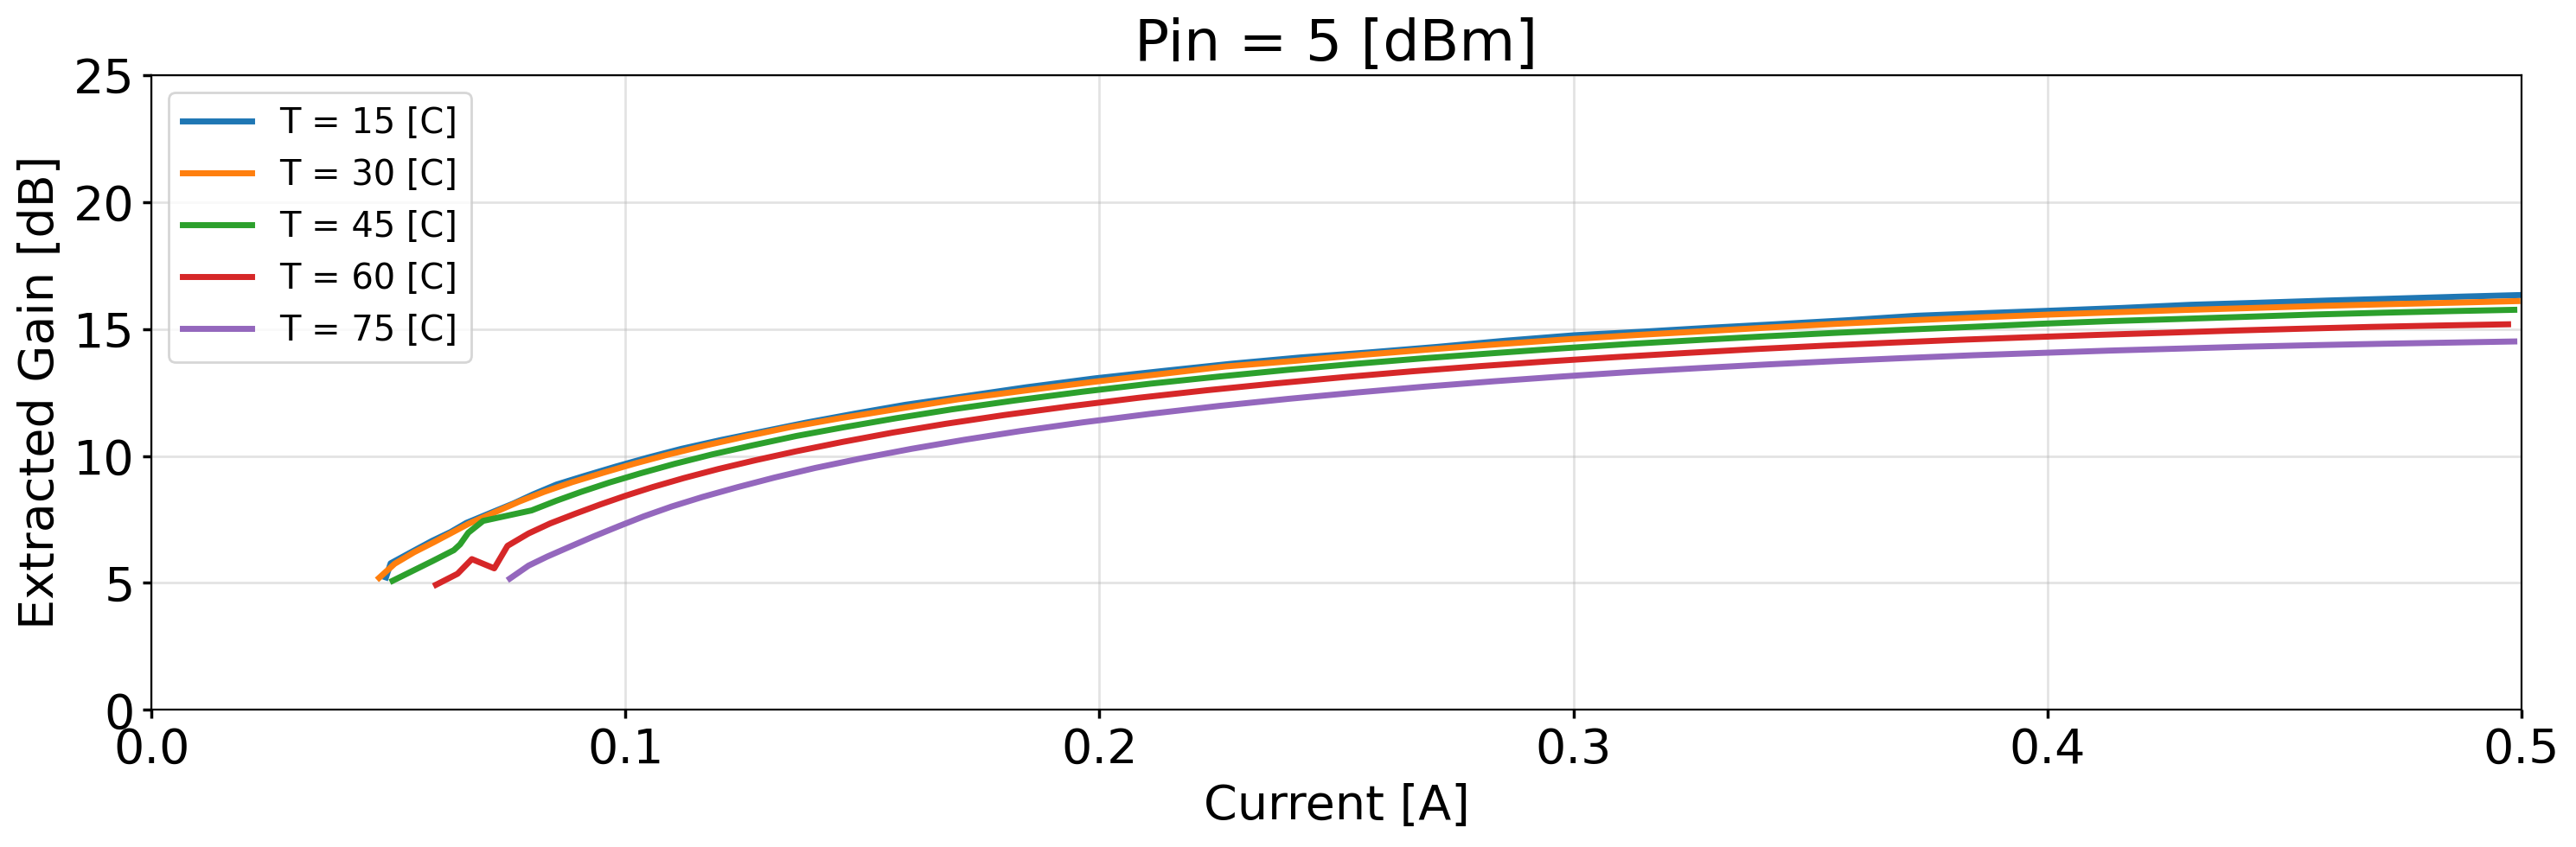

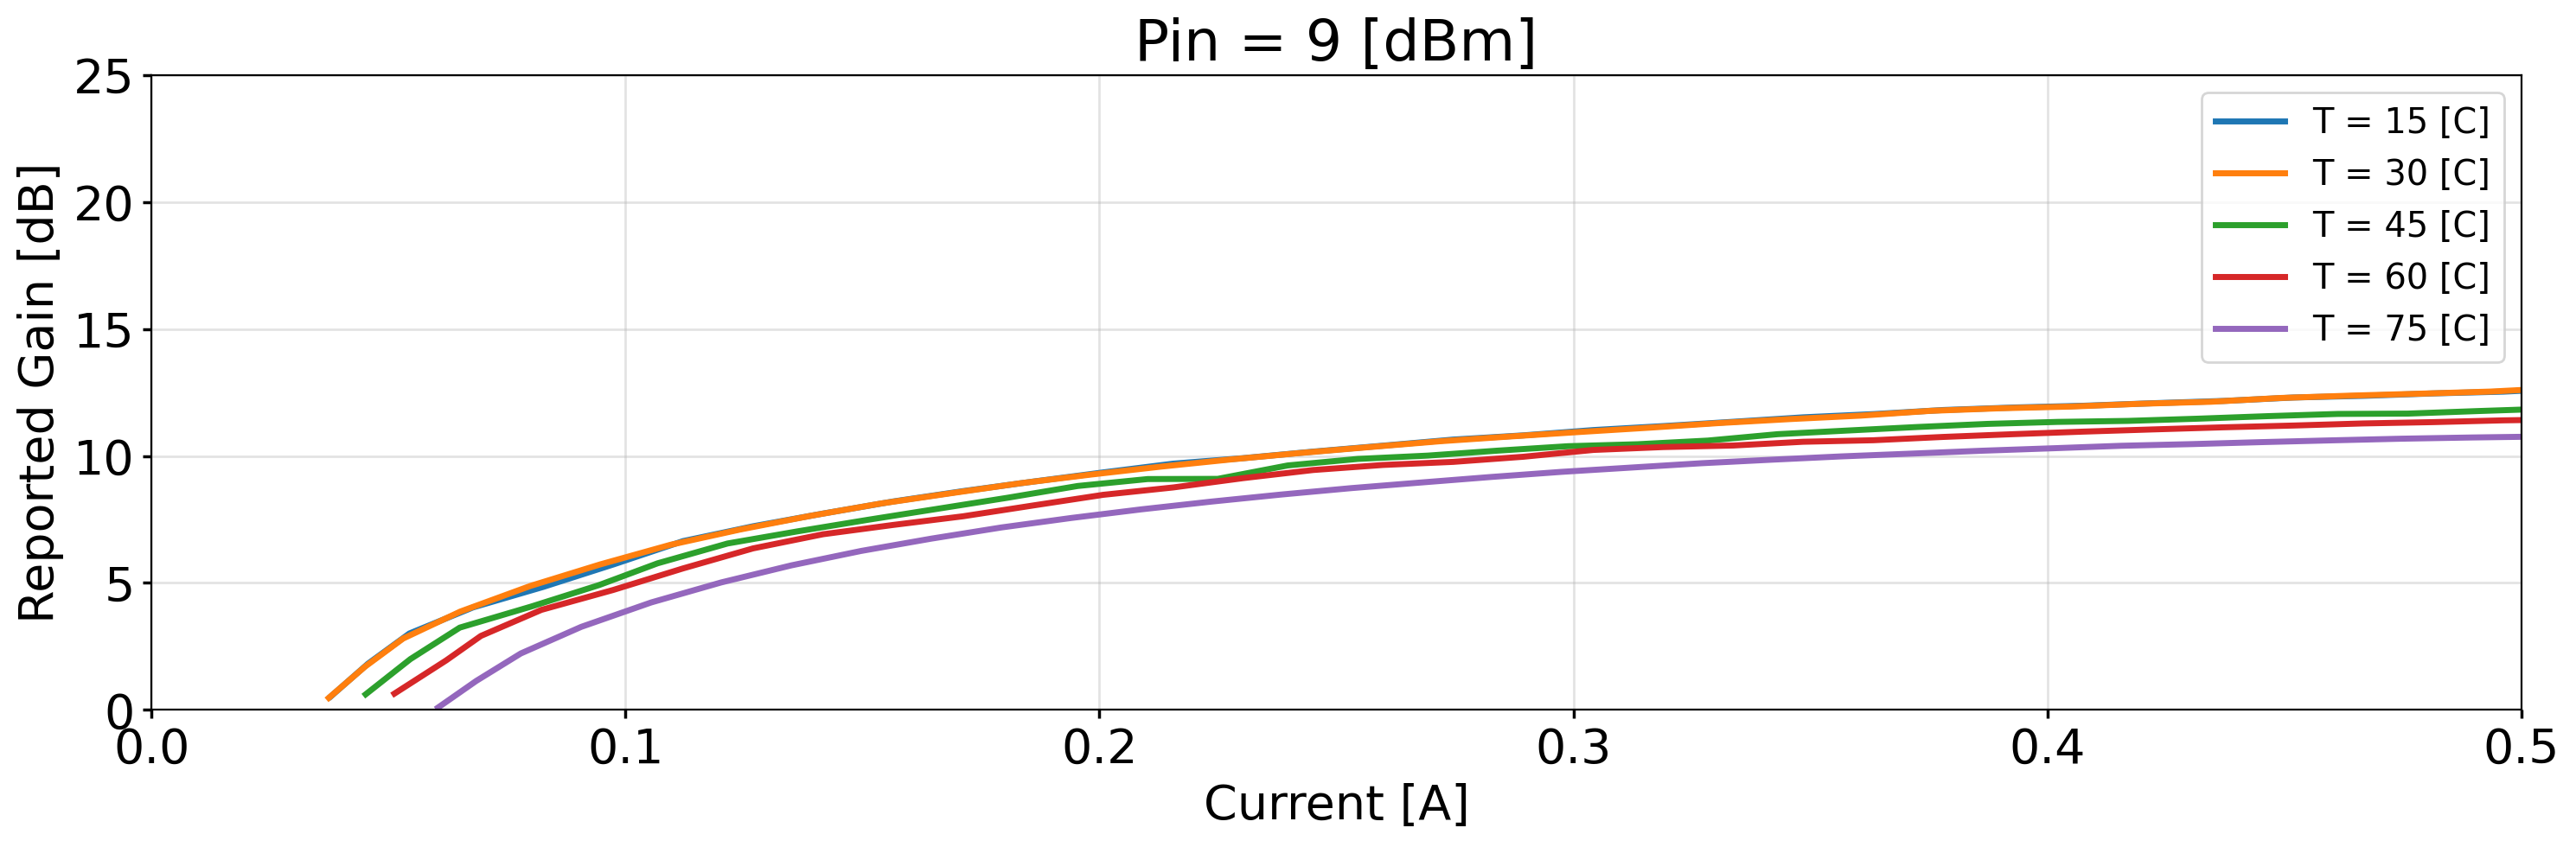

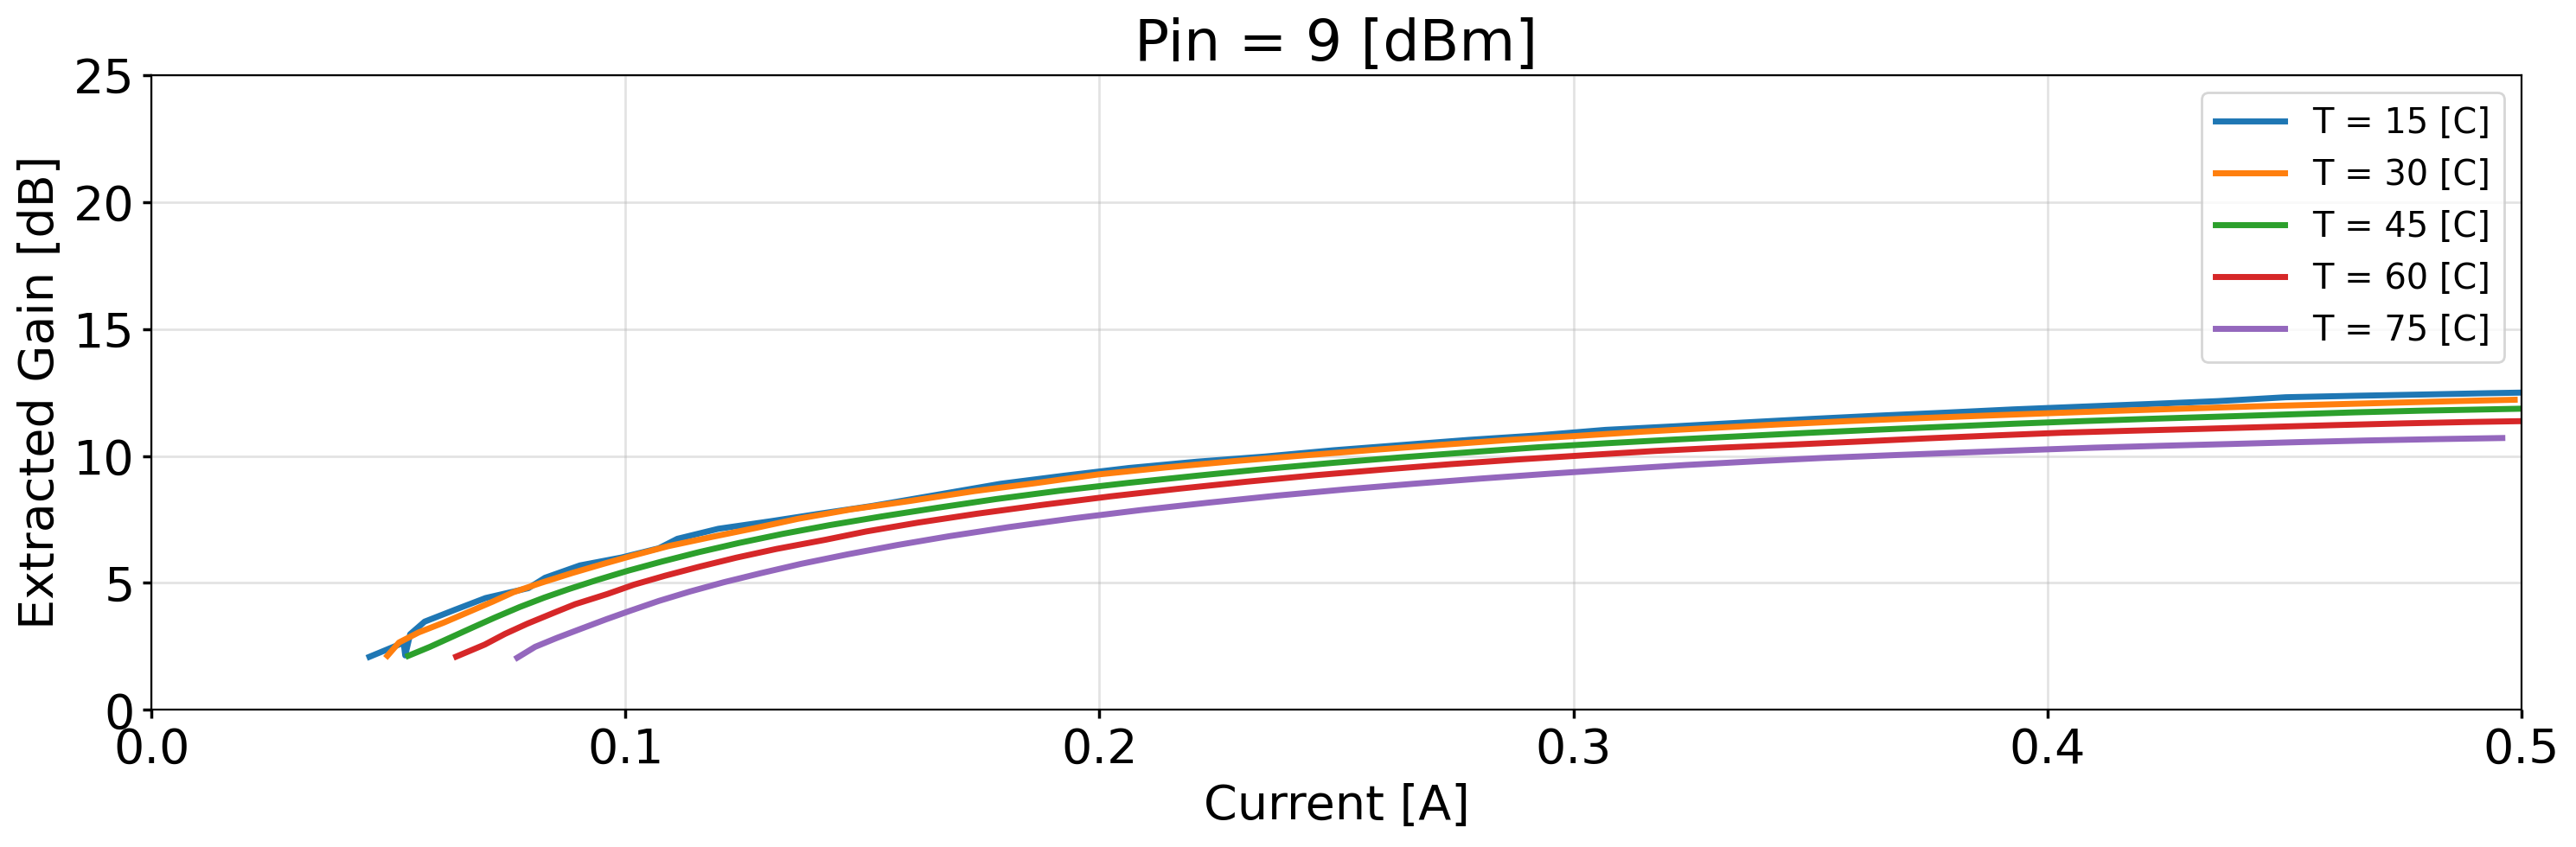

In [8]:
T_range = [15, 30, 45, 60, 75]
plt.figure(figsize=(15,5))
for T in T_range:
  soa_gain_pin = pd.read_csv(f'SOA_Pout_dBm_I_A_Pin_5dBm_T{T}C.csv', header=None)
  soa_gain_pin.sort_values(by=[0], inplace=True)
  soa_gain_pin[1] = soa_gain_pin[1] - 5
  plt.plot(soa_gain_pin[0], soa_gain_pin[1], label=f'T = {T} [C]')
plt.xlabel('Current [A]')
plt.ylabel('Extracted Gain [dB]')
plt.title("Pin = 5 [dBm]")
plt.grid(True)
plt.xlim([0,0.5])
plt.ylim([0, 25])
plt.legend()
plt.tight_layout()
plt.figure(figsize=(15,5))
for T in T_range:
  soa_gain_pin = pd.read_csv(f'SOA_Gain_dB_I_A_Pin_9dBm_T{T}C.csv', header=None)
  soa_gain_pin.sort_values(by=[0], inplace=True)
  plt.plot(soa_gain_pin[0], soa_gain_pin[1], label=f'T = {T} [C]')
plt.xlabel('Current [A]')
plt.ylabel('Reported Gain [dB]')
plt.title("Pin = 9 [dBm]")
plt.grid(True)
plt.xlim([0,0.5])
plt.ylim([0, 25])
plt.legend()
plt.tight_layout()
plt.figure(figsize=(15,5))
for T in T_range:
  soa_gain_pin = pd.read_csv(f'SOA_Pout_dBm_I_A_Pin_9dBm_T{T}C.csv', header=None)
  soa_gain_pin.sort_values(by=[0], inplace=True)
  soa_gain_pin[1] = soa_gain_pin[1] - 9
  plt.plot(soa_gain_pin[0], soa_gain_pin[1], label=f'T = {T} [C]')
plt.xlabel('Current [A]')
plt.ylabel('Extracted Gain [dB]')
plt.title("Pin = 9 [dBm]")
plt.grid(True)
plt.xlim([0,0.5])
plt.ylim([0, 25])
plt.legend()
plt.tight_layout()

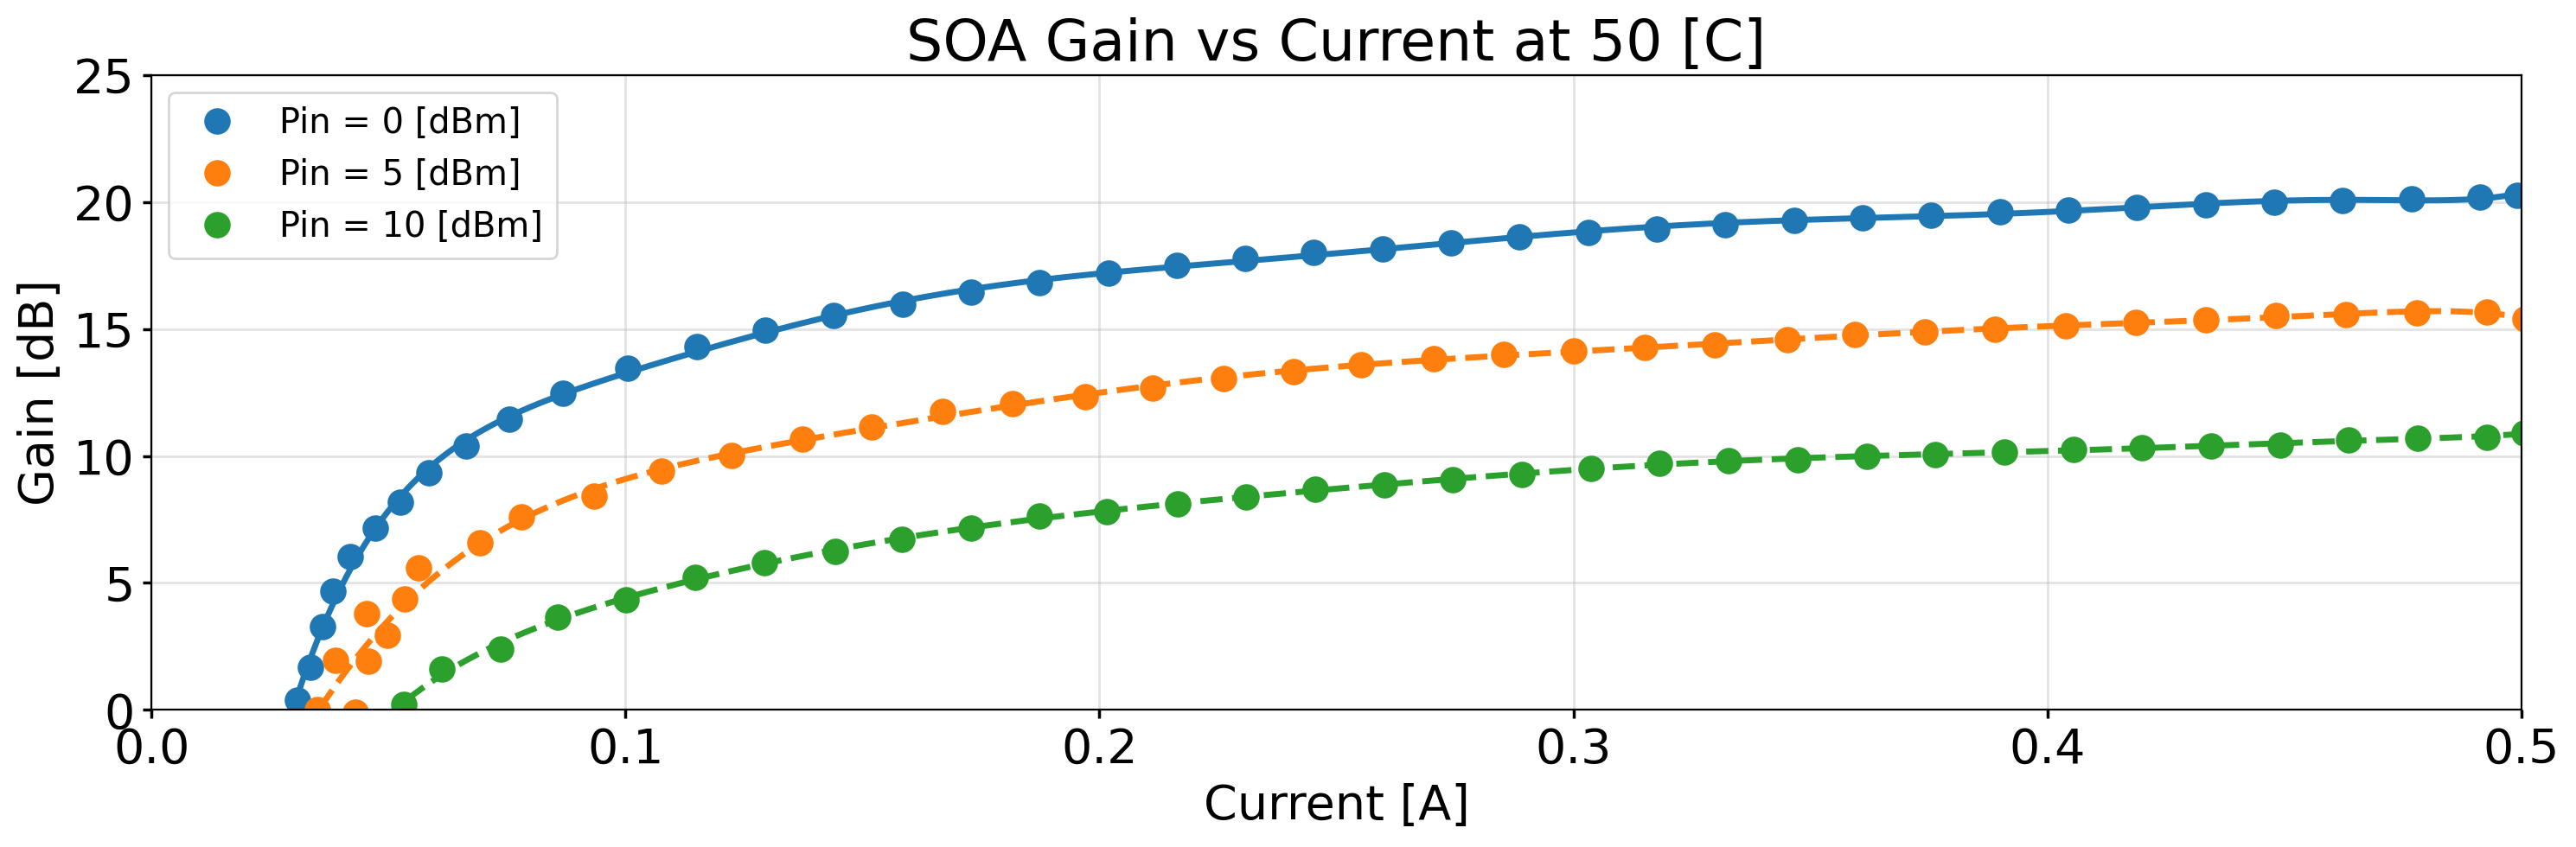

In [9]:
soa_gi_pin_0dBm = pd.read_csv('SOA_Gain_dB_I_A_Pin_0dBm_T50C.csv', header=None)
soa_gi_pin_5dBm = pd.read_csv('SOA_Gain_dB_I_A_Pin_5dBm_T50C.csv', header=None)
soa_gi_pin_5dBm.sort_values(by=[0], inplace=True)
soa_gi_pin_10dBm = pd.read_csv('SOA_Gain_dB_I_A_Pin_10dBm_T50C.csv', header=None)

soa_gi_pin_0dBm_50c_fit = np.polyfit(soa_gi_pin_0dBm[0], soa_gi_pin_0dBm[1], 9)
soa_gi_pin_5dBm_50c_fit = np.polyfit(soa_gi_pin_5dBm[0], soa_gi_pin_5dBm[1], 9)
soa_gi_pin_10dBm_50c_fit = np.polyfit(soa_gi_pin_10dBm[0], soa_gi_pin_10dBm[1], 9)

# current = np.linspace(0.05,0.5,1001)

plt.figure(figsize=(15,5))
p = plt.plot(soa_gi_pin_0dBm[0], soa_gi_pin_0dBm[1], 'o', label='Pin = 0 [dBm]')
plt.plot(current, np.polyval(soa_gi_pin_0dBm_50c_fit, current), color=p[0].get_color())
p = plt.plot(soa_gi_pin_5dBm[0], soa_gi_pin_5dBm[1], 'o', label='Pin = 5 [dBm]')
plt.plot(current, np.polyval(soa_gi_pin_5dBm_50c_fit, current), color=p[0].get_color(), linestyle='--')
p = plt.plot(soa_gi_pin_10dBm[0], soa_gi_pin_10dBm[1],'o', label='Pin = 10 [dBm]')
plt.plot(current, np.polyval(soa_gi_pin_10dBm_50c_fit, current), color=p[0].get_color(), linestyle='--')
plt.xlabel('Current [A]')
plt.ylabel('Gain [dB]')
plt.title('SOA Gain vs Current at 50 [C]')
plt.grid(True)
plt.legend()
plt.xlim([0,0.5])
plt.ylim([0,25])
plt.tight_layout()

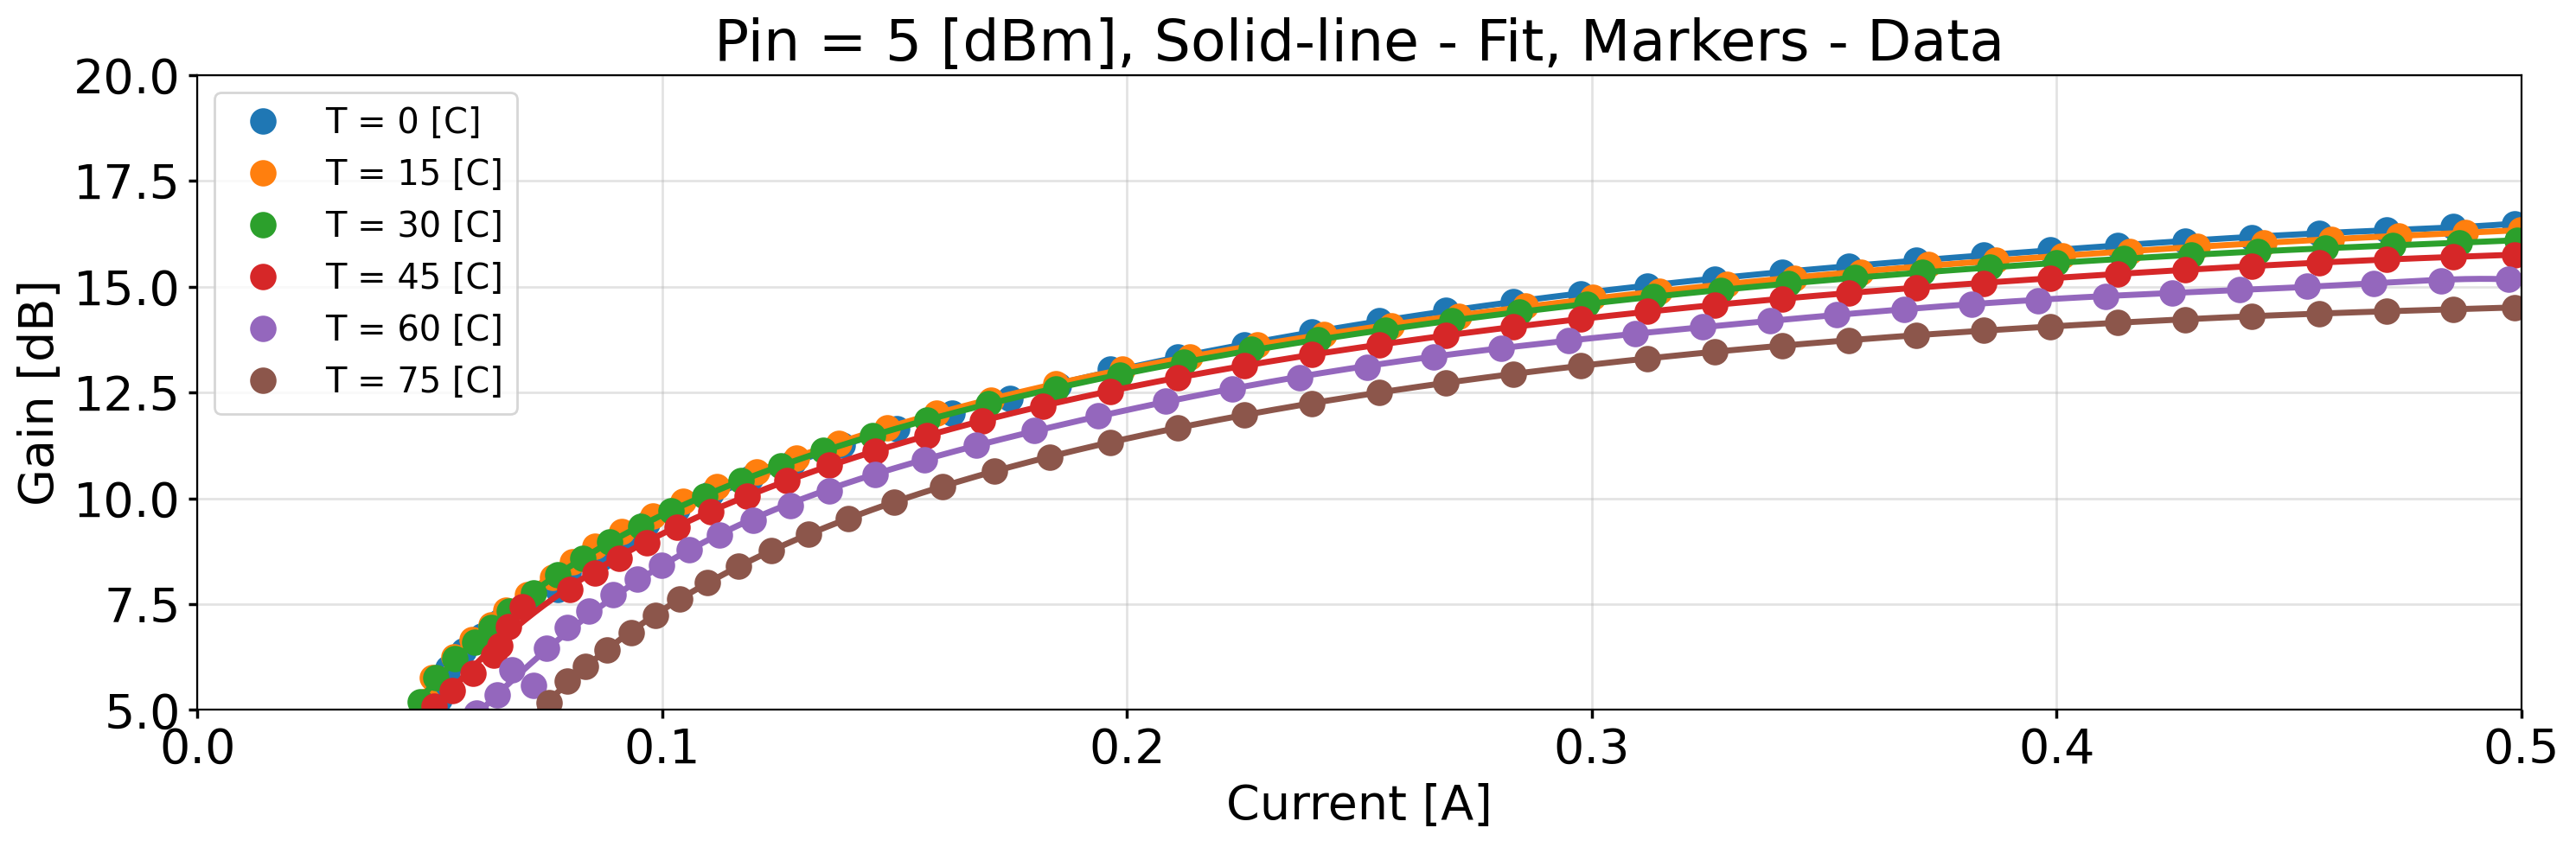

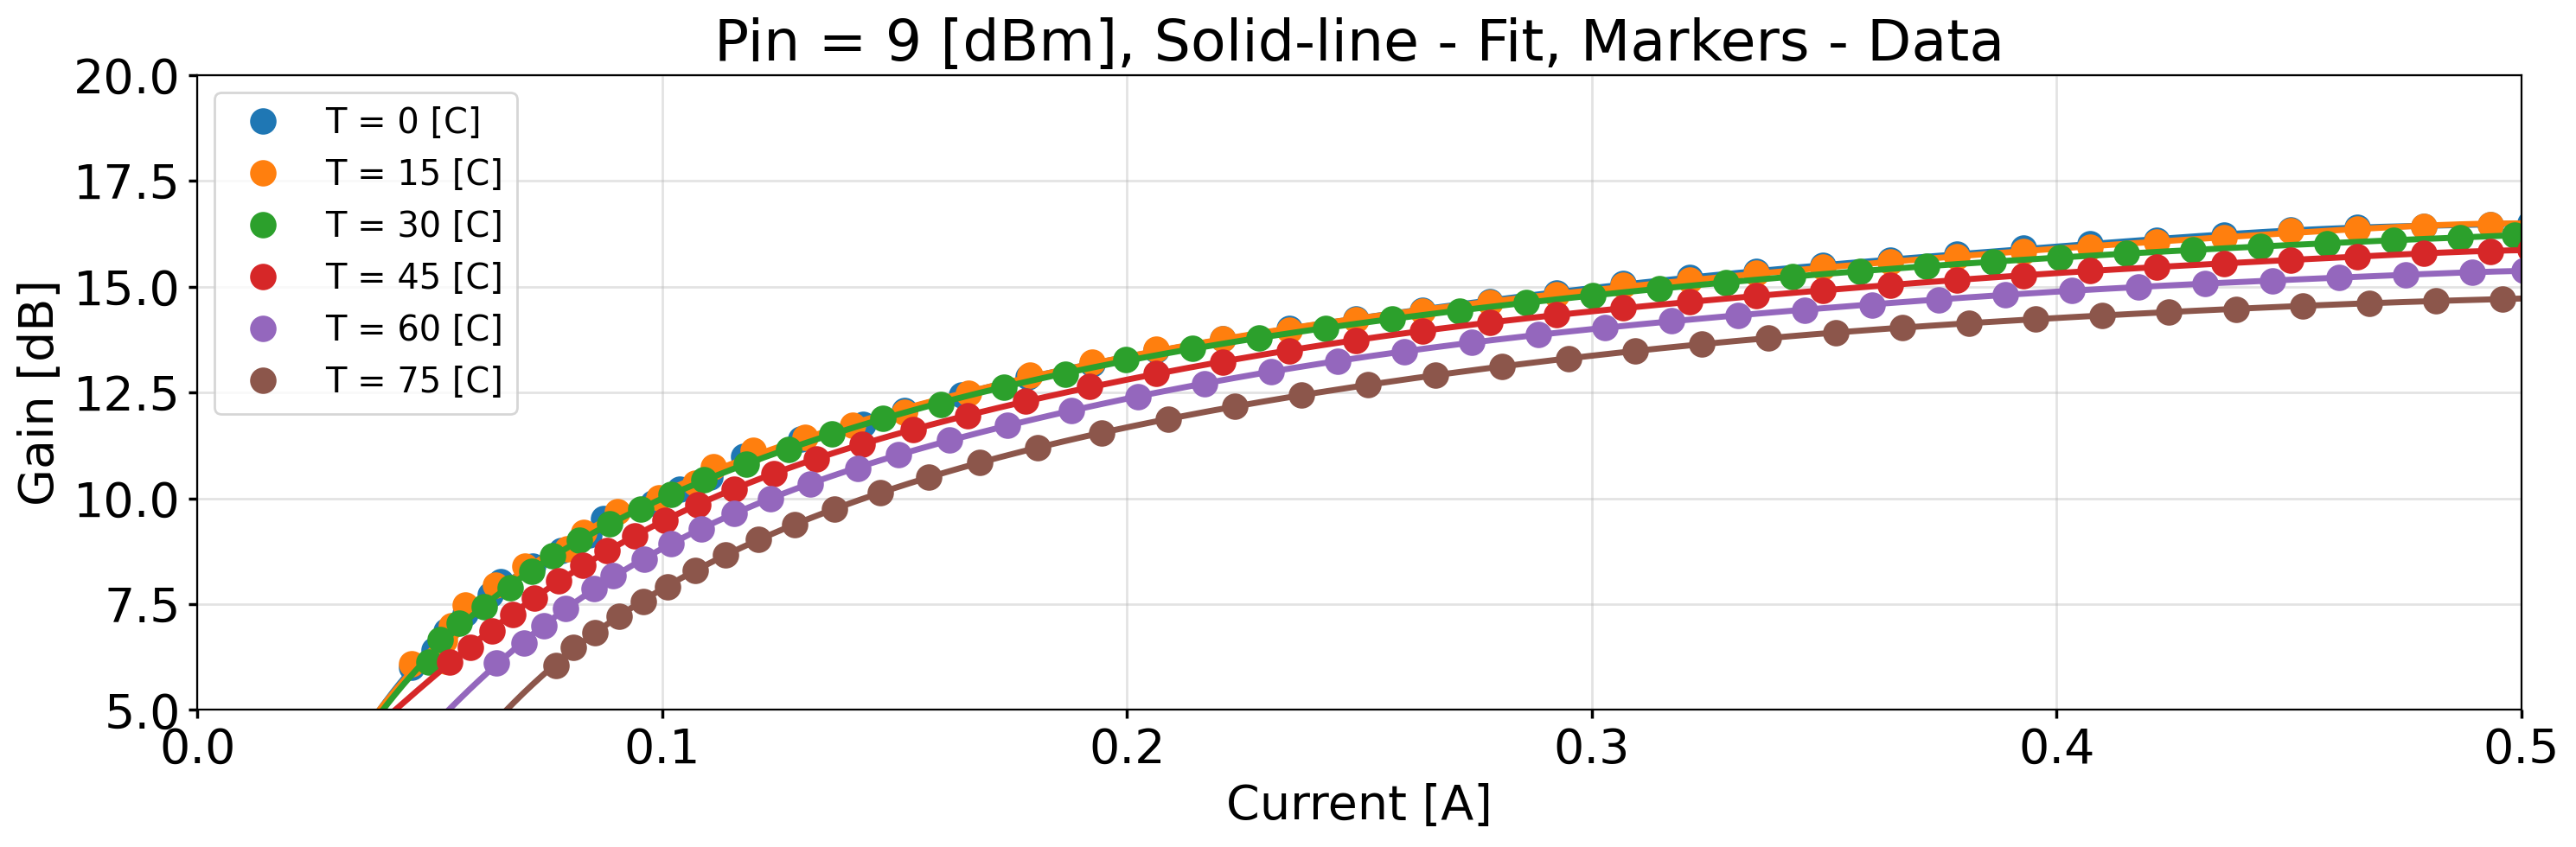

In [10]:
soa_li_pin_5dBm_0c = pd.read_csv('SOA_Pout_dBm_I_A_Pin_5dBm_T0C.csv', header=None)
soa_li_pin_5dBm_15c = pd.read_csv('SOA_Pout_dBm_I_A_Pin_5dBm_T15C.csv', header=None)
soa_li_pin_5dBm_30c = pd.read_csv('SOA_Pout_dBm_I_A_Pin_5dBm_T30C.csv', header=None)
soa_li_pin_5dBm_45c = pd.read_csv('SOA_Pout_dBm_I_A_Pin_5dBm_T45C.csv', header=None)
soa_li_pin_5dBm_60c = pd.read_csv('SOA_Pout_dBm_I_A_Pin_5dBm_T60C.csv', header=None)
soa_li_pin_5dBm_75c = pd.read_csv('SOA_Pout_dBm_I_A_Pin_5dBm_T75C.csv', header=None)

soa_li_pin_9dBm_0c = pd.read_csv('SOA_Pout_dBm_I_A_Pin_9dBm_T0C.csv', header=None)
soa_li_pin_9dBm_15c = pd.read_csv('SOA_Pout_dBm_I_A_Pin_9dBm_T15C.csv', header=None)
soa_li_pin_9dBm_30c = pd.read_csv('SOA_Pout_dBm_I_A_Pin_9dBm_T30C.csv', header=None)
soa_li_pin_9dBm_45c = pd.read_csv('SOA_Pout_dBm_I_A_Pin_9dBm_T45C.csv', header=None)
soa_li_pin_9dBm_60c = pd.read_csv('SOA_Pout_dBm_I_A_Pin_9dBm_T60C.csv', header=None)
soa_li_pin_9dBm_75c = pd.read_csv('SOA_Pout_dBm_I_A_Pin_9dBm_T75C.csv', header=None)

soa_gi_pin_5dBm_0c_fit = np.polyfit(soa_li_pin_5dBm_0c[0], soa_li_pin_5dBm_0c[1] - 5, 9)
soa_gi_pin_5dBm_15c_fit = np.polyfit(soa_li_pin_5dBm_15c[0], soa_li_pin_5dBm_15c[1] - 5, 9)
soa_gi_pin_5dBm_30c_fit = np.polyfit(soa_li_pin_5dBm_30c[0], soa_li_pin_5dBm_30c[1] - 5, 9)
soa_gi_pin_5dBm_45c_fit = np.polyfit(soa_li_pin_5dBm_45c[0], soa_li_pin_5dBm_45c[1] - 5, 9)
soa_gi_pin_5dBm_60c_fit = np.polyfit(soa_li_pin_5dBm_60c[0], soa_li_pin_5dBm_60c[1] - 5, 9)
soa_gi_pin_5dBm_75c_fit = np.polyfit(soa_li_pin_5dBm_75c[0], soa_li_pin_5dBm_75c[1] - 5, 9)

soa_gi_pin_9dBm_0c_fit = np.polyfit(soa_li_pin_9dBm_0c[0], soa_li_pin_9dBm_0c[1] -5, 9)
soa_gi_pin_9dBm_15c_fit = np.polyfit(soa_li_pin_9dBm_15c[0], soa_li_pin_9dBm_15c[1] -5, 9)
soa_gi_pin_9dBm_30c_fit = np.polyfit(soa_li_pin_9dBm_30c[0], soa_li_pin_9dBm_30c[1]-5, 9)
soa_gi_pin_9dBm_45c_fit = np.polyfit(soa_li_pin_9dBm_45c[0], soa_li_pin_9dBm_45c[1]-5, 9)
soa_gi_pin_9dBm_60c_fit = np.polyfit(soa_li_pin_9dBm_60c[0], soa_li_pin_9dBm_60c[1]-5, 9)
soa_gi_pin_9dBm_75c_fit = np.polyfit(soa_li_pin_9dBm_75c[0], soa_li_pin_9dBm_75c[1]-5, 9)

# current = np.linspace(0.05,0.5,1001)

plt.figure(figsize=(15,5))
p = plt.plot(soa_li_pin_5dBm_0c[0], soa_li_pin_5dBm_0c[1] - 5, 'o', label='T = 0 [C]')
plt.plot(current, np.polyval(soa_gi_pin_5dBm_0c_fit, current), color=p[0].get_color())
p = plt.plot(soa_li_pin_5dBm_15c[0], soa_li_pin_5dBm_15c[1] - 5, 'o', label='T = 15 [C]')
plt.plot(current, np.polyval(soa_gi_pin_5dBm_15c_fit, current), color=p[0].get_color())
p = plt.plot(soa_li_pin_5dBm_30c[0], soa_li_pin_5dBm_30c[1] - 5,'o', label='T = 30 [C]')
plt.plot(current, np.polyval(soa_gi_pin_5dBm_30c_fit, current), color=p[0].get_color())
p = plt.plot(soa_li_pin_5dBm_45c[0], soa_li_pin_5dBm_45c[1] - 5, 'o', label='T = 45 [C]')
plt.plot(current, np.polyval(soa_gi_pin_5dBm_45c_fit, current), color=p[0].get_color())
p = plt.plot(soa_li_pin_5dBm_60c[0], soa_li_pin_5dBm_60c[1] - 5, 'o', label='T = 60 [C]')
plt.plot(current, np.polyval(soa_gi_pin_5dBm_60c_fit, current), color=p[0].get_color())
p = plt.plot(soa_li_pin_5dBm_75c[0], soa_li_pin_5dBm_75c[1] - 5,'o', label='T = 75 [C]')
plt.plot(current, np.polyval(soa_gi_pin_5dBm_75c_fit, current), color=p[0].get_color())
plt.xlabel('Current [A]')
plt.ylabel('Gain [dB]')
plt.title('Pin = 5 [dBm], Solid-line - Fit, Markers - Data')
plt.grid(True)
plt.legend()
plt.xlim([0,0.5])
plt.ylim([5,20])
plt.tight_layout()

plt.figure(figsize=(15,5))
p = plt.plot(soa_li_pin_9dBm_0c[0], soa_li_pin_9dBm_0c[1] - 5, 'o', label='T = 0 [C]')
plt.plot(current, np.polyval(soa_gi_pin_9dBm_0c_fit, current), color=p[0].get_color())
p = plt.plot(soa_li_pin_9dBm_15c[0], soa_li_pin_9dBm_15c[1] - 5, 'o', label='T = 15 [C]')
plt.plot(current, np.polyval(soa_gi_pin_9dBm_15c_fit, current), color=p[0].get_color())
p = plt.plot(soa_li_pin_9dBm_30c[0], soa_li_pin_9dBm_30c[1] - 5,'o', label='T = 30 [C]')
plt.plot(current, np.polyval(soa_gi_pin_9dBm_30c_fit, current), color=p[0].get_color())
p = plt.plot(soa_li_pin_9dBm_45c[0], soa_li_pin_9dBm_45c[1] - 5, 'o', label='T = 45 [C]')
plt.plot(current, np.polyval(soa_gi_pin_9dBm_45c_fit, current), color=p[0].get_color())
p = plt.plot(soa_li_pin_9dBm_60c[0], soa_li_pin_9dBm_60c[1] - 5, 'o', label='T = 60 [C]')
plt.plot(current, np.polyval(soa_gi_pin_9dBm_60c_fit, current), color=p[0].get_color())
p = plt.plot(soa_li_pin_9dBm_75c[0], soa_li_pin_9dBm_75c[1] - 5,'o', label='T = 75 [C]')
plt.plot(current, np.polyval(soa_gi_pin_9dBm_75c_fit, current), color=p[0].get_color())
plt.xlabel('Current [A]')
plt.ylabel('Gain [dB]')
plt.title('Pin = 9 [dBm], Solid-line - Fit, Markers - Data')
plt.grid(True)
plt.legend()
plt.xlim([0,0.5])
plt.ylim([5,20])
plt.tight_layout()

In [11]:
data_extract = {
  "Current": current.tolist(),
  "DFB":{
    "IV": dfb_lin_fit.tolist(),
    "LI": dfb_li_fit.tolist()
  },
  "SOA":{
    "IV": soa_lin_fit.tolist(),
    "Gain": {
      "0dBm": {
        "50C": soa_gi_pin_0dBm_50c_fit.tolist(),
      },
      "5dBm": {
        "0C": soa_gi_pin_5dBm_0c_fit.tolist(),
        "15C": soa_gi_pin_5dBm_15c_fit.tolist(),
        "30C": soa_gi_pin_5dBm_30c_fit.tolist(),
        "45C": soa_gi_pin_5dBm_45c_fit.tolist(),
        "50C": soa_gi_pin_5dBm_50c_fit.tolist(),
        "60C": soa_gi_pin_5dBm_60c_fit.tolist(),
        "75C": soa_gi_pin_5dBm_75c_fit.tolist(),
      },
      "9dBm": {
        "0C": soa_gi_pin_9dBm_0c_fit.tolist(),
        "15C": soa_gi_pin_9dBm_15c_fit.tolist(),
        "30C": soa_gi_pin_9dBm_30c_fit.tolist(),
        "45C": soa_gi_pin_9dBm_45c_fit.tolist(),
        "60C": soa_gi_pin_9dBm_60c_fit.tolist(),
        "75C": soa_gi_pin_9dBm_75c_fit.tolist(),
      },
      "10dBm": {
        "50C": soa_gi_pin_10dBm_50c_fit.tolist(),
      }
    },
  }
}

with open("sppd_data.yaml","w") as fh:
  yaml.dump(data_extract, fh)